# **Project Name** - Bike Sharing Demand Prediction





##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name -**            Dharamveer Yadav


# **Project Summary -**

In this project, I aimed to predict bike demand for a rental company using a supervised machine learning model. The goal is to accurately forecast how many bikes would be needed at different times to help the company manage their inventory and pricing better.

The dataset I worked with contained information about bike rentals, including details like the number of bikes rented, the date and time, weather conditions, season, holidays, and whether it was a functioning or non-functioning day.

After cleaning and preparing the data, I split it into training and test sets. I trained several different machine learning models using the training data and fine-tuned their settings to find the best-performing one. I evaluated the model's accuracy using metrics like mean absolute error (MAE), root mean squared error (RMSE), and R-squared (R²). The final model was quite accurate, achieving an R-squared value of 0.88 and a mean absolute error of just 2.58.

To better understand the model, I also conducted tests to see how individual features, like temperature, weather, and seasonality, affected bike demand. These features turned out to be the most influential in predicting the demand for bikes.

# **GitHub Link -**

https://github.com/Dharamveer09/Bike-Sharing-Demand-Prediction/blob/main/Regression%20-%20Bike%20Sharing%20Demand%20Prediction.ipynb

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


> My goal is to build a highly accurate model with a focus on minimizing mean absolute error and maximizing the R-squared value. Additionally, the model should offer valuable insights into the key factors affecting bike demand, enabling the bike-sharing company to make informed, data-driven decisions to optimize their operations. This dual focus on accuracy and interpretability will ensure that the model not only predicts demand well but also provides actionable information for the company.

# ***Let's Begin !***

## ***1. Know Your Data***

# **Loading Dataset and Importing Modules**

## IMPORT LIBRARIES

In [ ]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

# Preprocessing and scaling
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, MultiLabelBinarizer

# Machine learning models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, log_loss

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


## Reading the Dataset using pd.read_csv() method.


In [ ]:
bike_df = pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1')


The UnicodeDecodeError you encountered happened because the default encoding used by pandas.read_csv() is 'utf-8'(Unicode Transformation Format - 8-bit), which couldn't handle some of the characters in the CSV file.

'utf-8' is efficient and widely used, but it can't handle certain special characters or characters from some non-Latin scripts without issues.

In [ ]:
#bike_df = pd.read_csv("Seoul_Bike_Data.csv", encoding='cp1252')


# **Understand More About The Data**

### Dataset First View

In [ ]:
# Viewing the data of top 5 rows to take a glimps of the data
bike_df.head(3)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

bike_df.shape

(8760, 14)

In [ ]:
#Getting all the columns
print("Columns of the dataset:")

bike_df.columns

Columns of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## Dataset Information

In [ ]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Since there are 8760 rows and all columns have that 8760 non-null values which means, the dataset has no null values.

In [ ]:
# 'Describing' Dataset

bike_df.describe()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


## Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

duplicate_values = bike_df[bike_df.duplicated()]

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_values.shape[0]}")


Number of duplicate rows: 0


### Check Unique Values for each variable.

In [ ]:
# Check unique values for each variable
for col in bike_df.columns:
    print(f"No. of unique values in {col}: {bike_df[col].nunique()}")

"""
bike_df.columns returns an index object containing the names of all the columns in the DataFrame bike_df.

bike_df[col] accesses the data in the column named col. So, for example,
if col is 'Temperature(°C)', bike_df[col] returns the series of all temperature values.

The nunique() function is called on the series (i.e., the column data) to count the number of unique values in that column.
This function ignores NaN values and returns the number of distinct elements.

"""


No. of unique values in Date: 365
No. of unique values in Rented_Bike_Count: 2166
No. of unique values in Hour: 24
No. of unique values in Temperature: 546
No. of unique values in Humidity: 90
No. of unique values in Wind_speed: 65
No. of unique values in Visibility: 1789
No. of unique values in Dew_point_temperature: 556
No. of unique values in Solar_Radiation: 345
No. of unique values in Rainfall: 61
No. of unique values in Snowfall: 51
No. of unique values in Seasons: 4
No. of unique values in Holiday: 2
No. of unique values in Functioning_Day: 2


## Missing Values / Null values

In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

,0
Date,0
Rented_Bike_Count,0
Hour,0
Temperature,0
Humidity,0
Wind_speed,0
Visibility,0
Dew_point_temperature,0
Solar_Radiation,0
Rainfall,0


## Visualizing the missing values

"\nsns.heatmap() is a function from the Seaborn library used to create heatmaps, \nwhich are graphical representations of data where individual values are represented as colors.\n\nbike_df.isnull() is a method in pandas that returns a DataFrame of the same shape as bike_df, where each element is a boolean (True or False).\n\nTrue indicates that the corresponding cell in bike_df is NaN (missing or null), while False indicates that the cell has a valid value.\n\ncbar=False turns off the color bar (a guide that shows the relationship between colors and the data values).\nSince this heatmap only shows missing vs. non-missing values (binary information), the color bar is not necessary.\n\ncmap='viridis' specifies the color map used to represent the data in the heatmap.\n'viridis' is a color map that ranges from yellow to green to purple, and it’s often used for better visual contrast. In this case, it will color-code the True and False values from bike_df.isnull(), helping you to see where 

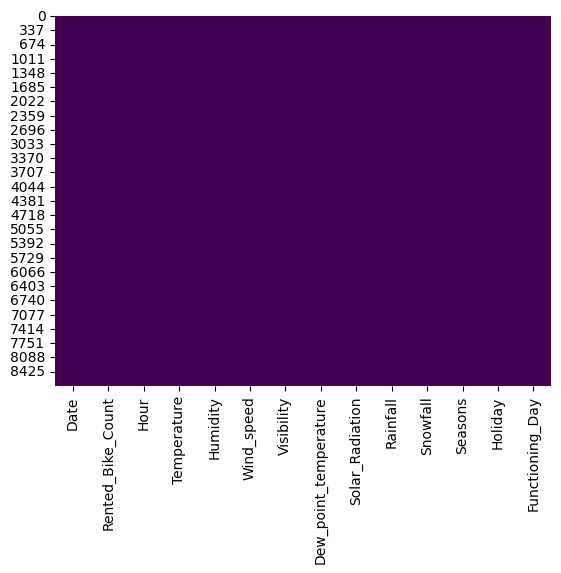

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap

sns.heatmap(bike_df.isnull(), cbar=False, cmap='viridis');

"""
sns.heatmap() is a function from the Seaborn library used to create heatmaps,
which are graphical representations of data where individual values are represented as colors.

bike_df.isnull() is a method in pandas that returns a DataFrame of the same shape as bike_df, where each element is a boolean (True or False).

True indicates that the corresponding cell in bike_df is NaN (missing or null), while False indicates that the cell has a valid value.

cbar=False turns off the color bar (a guide that shows the relationship between colors and the data values).
Since this heatmap only shows missing vs. non-missing values (binary information), the color bar is not necessary.

cmap='viridis' specifies the color map used to represent the data in the heatmap.
'viridis' is a color map that ranges from yellow to green to purple, and it’s often used for better visual contrast. In this case, it will color-code the True and False values from bike_df.isnull(), helping you to see where the missing data is.


"""


### What did you know about your dataset?

* There are 8760 observation and 14 features.
* In a day we have 24 hours and we have 365 days a year so 365 multiplied by 24 = 8760, which represents the number of line in the dataset
* There are no null values.
* Dataset has all unique values i.e., there is no duplicate, which means data is free from bias as duplicates which can cause problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.
* Date has some object data types, it should be datetime data type.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f'Features/Columns: {bike_df.columns.to_list()}')

Features/Columns: ['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day']


In [ ]:
#Looking for the description of the dataset to get insights of the data
bike_df.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


##Features description

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str*, we need to convert into datetime format.

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *.

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*


# **Preprocessing the dataset**

**Why do we need to handle missing values?**
* ***Handling missing values is essential because they can negatively impact model performance by introducing bias and reducing accuracy. Many machine learning algorithms require complete datasets, and missing data can lead to unreliable or inconsistent results. Ignoring missing values can also compromise data integrity, leading to incomplete analysis and potentially misleading insights. Therefore, addressing missing values is crucial for building robust, accurate models and ensuring the quality of the analysis.***

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

,0
Date,0
Rented_Bike_Count,0
Hour,0
Temperature,0
Humidity,0
Wind_speed,0
Visibility,0
Dew_point_temperature,0
Solar_Radiation,0
Rainfall,0


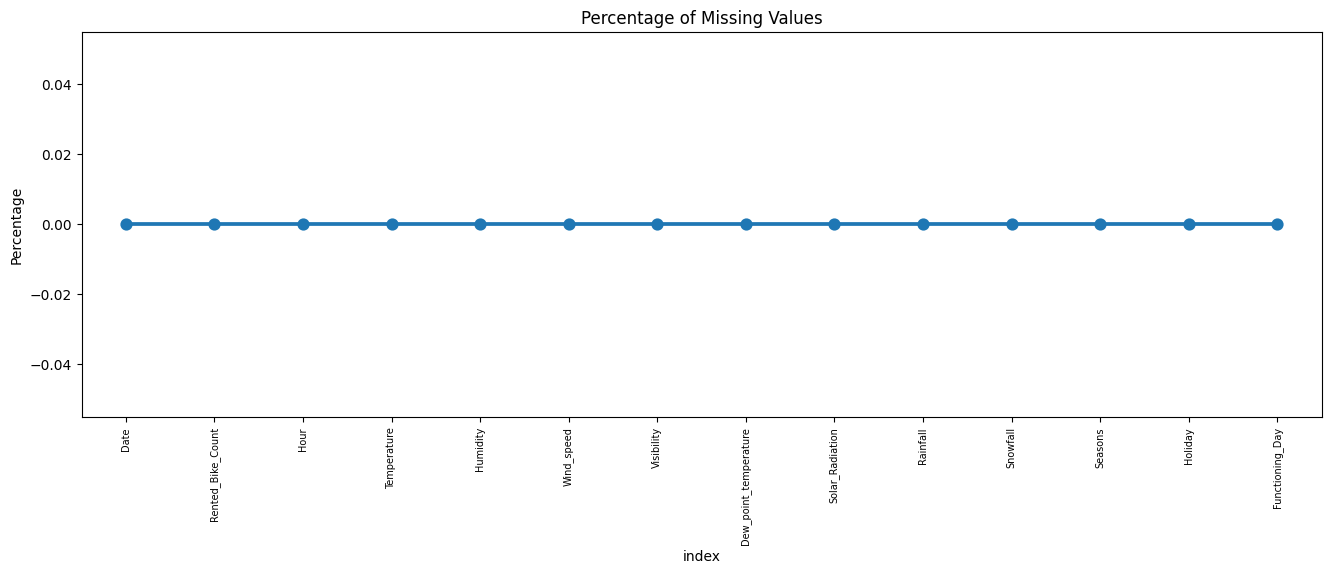

In [ ]:
# Calculate the percentage of missing values for each column
missing = pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()

"""
This function checks each cell in the DataFrame bike_df to determine if it is missing (i.e., NaN).
It returns a DataFrame of the same shape with True for missing values and False for non-missing values.

The .sum() method is applied to the DataFrame returned by isnull().
It sums up the True values (which are treated as 1) for each column, resulting in the total count of missing values per column.

/bike_df.shape[0]:
bike_df.shape[0] gives the number of rows in the DataFrame.
Dividing the total count of missing values by the number of rows gives the proportion of missing values for each column.

.reset_index():
This method resets the index of the DataFrame so that the original index (which was the column names) becomes a regular column in the DataFrame.
The resulting DataFrame will have two columns: one for column names and one for the percentage of missing values.
"""
# Create a figure to plot the data
plt.figure(figsize=(16,5))

# Create a point plot to show the percentage of missing values for each column
ax = sns.pointplot(x='index', y=0, data=missing)

# Rotate the x-axis labels for better readability and adjust their size
plt.xticks(rotation=90, fontsize=7)

# Set the title of the plot
plt.title("Percentage of Missing Values")

# Label the y-axis
plt.ylabel("Percentage")

# Display the plot
plt.show()


* ***As we can see above there are no missing value present***

##Duplicate values

**Why is it important to remove duplicate records from my data?**
* **"Removing duplicate records from your data is essential for maintaining the accuracy and integrity of your analysis. Duplicates can skew statistical results, leading to misleading insights and reduced model performance due to overfitting. They also indicate potential issues in data collection and increase computational and storage requirements, making data processing less efficient. By eliminating duplicates, you ensure cleaner, more reliable data, which enhances the quality of your results and optimizes resource usage.**

In [ ]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

* ***Some of  the columns name in the dataset are too large and clumsy so we change them into some simple name, and it don't affect our end results.***

##Changing column name

In [ ]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

* ***Python read "Date" column as a object type basically it reads as a string, as the date column is very important to analyze the users behaviour so we need to convert it into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.***




##Breaking date column

In [ ]:
# Import pandas for data manipulation
import pandas as pd

# Check the data type of the 'Date' column
print(bike_df['Date'].dtype)

# Convert 'Date' column to string (if it's not already)
if bike_df['Date'].dtype != 'str':
    bike_df['Date'] = bike_df['Date'].astype(str)

# Replace '-' with '/' if necessary (in case some dates still have '-')
bike_df['Date'] = bike_df['Date'].str.replace('-', '/')

# Convert 'Date' column to datetime objects with the correct format
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format="%Y/%m/%d")

# Extract year, month, and day into separate columns
bike_df['Year'] = bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['Day'] = bike_df['Date'].dt.day


In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

* ***So we converted the "date" column into 3 different column i.e "year","month","day".***
* ***The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it***.
* ***The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column***.

In [ ]:
bike_df['weekdays_weekend'].value_counts()

,count
weekdays_weekend,
0,6264
1,2496


##Changing data type

* ***As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.***

In [ ]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [ ]:
#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Year                   8760 non-null   int32   
 14  Month                  8760 non-null   i

In [ ]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year', 'Month',
       'Day', 'month', 'weekdays_weekend'],
      dtype='object')

## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# **Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

## **Univariate Analysis**

**Why do you do univariate analysis?**
* ***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.***

## **Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**
* ***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.***

##**Analysation of categorical variables**

* ***Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data type then we proceed with the numerical data type***

####Month

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month')]

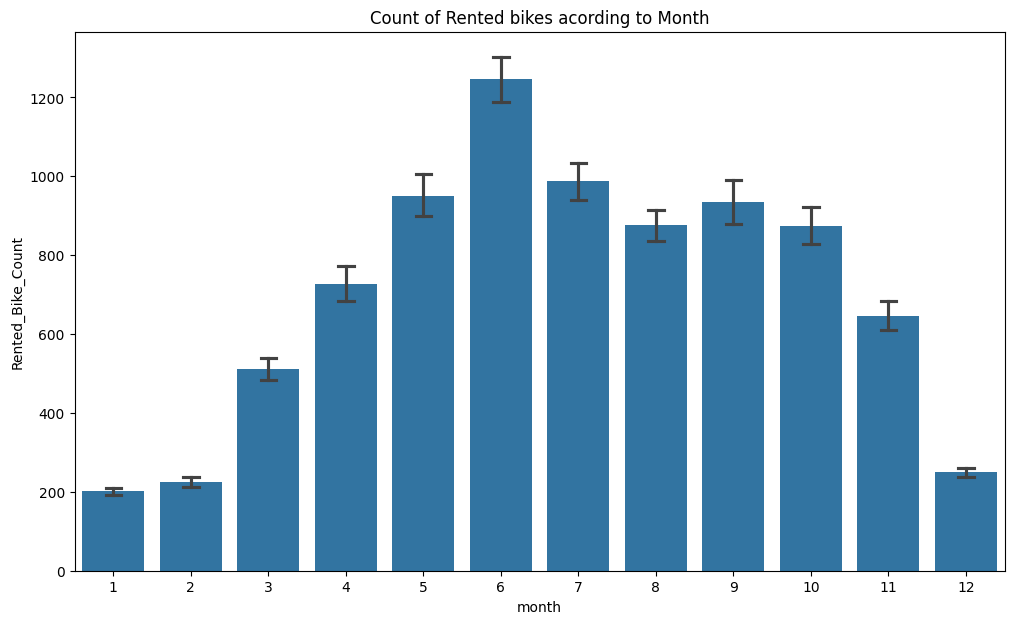

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month')

* ***From the above bar plot we can clearly say that, from the month 5 to 10
 (May - October) the demand of the rented bike is high as compare to other months.These months came inside the summer season.***

####weekdays_weekend

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

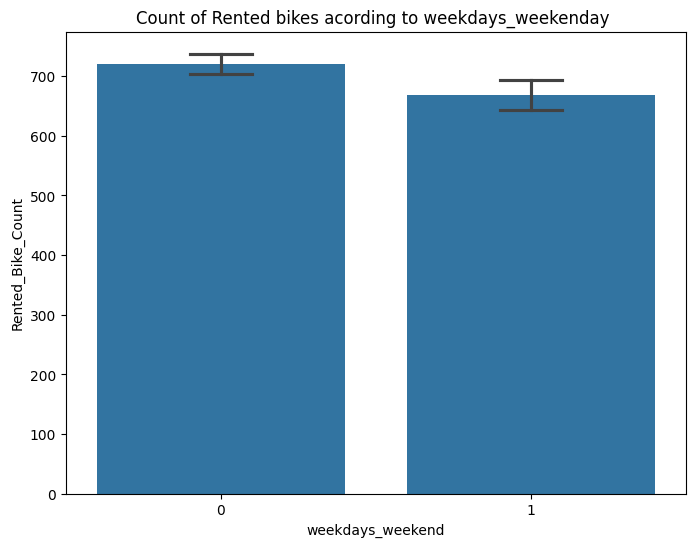

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

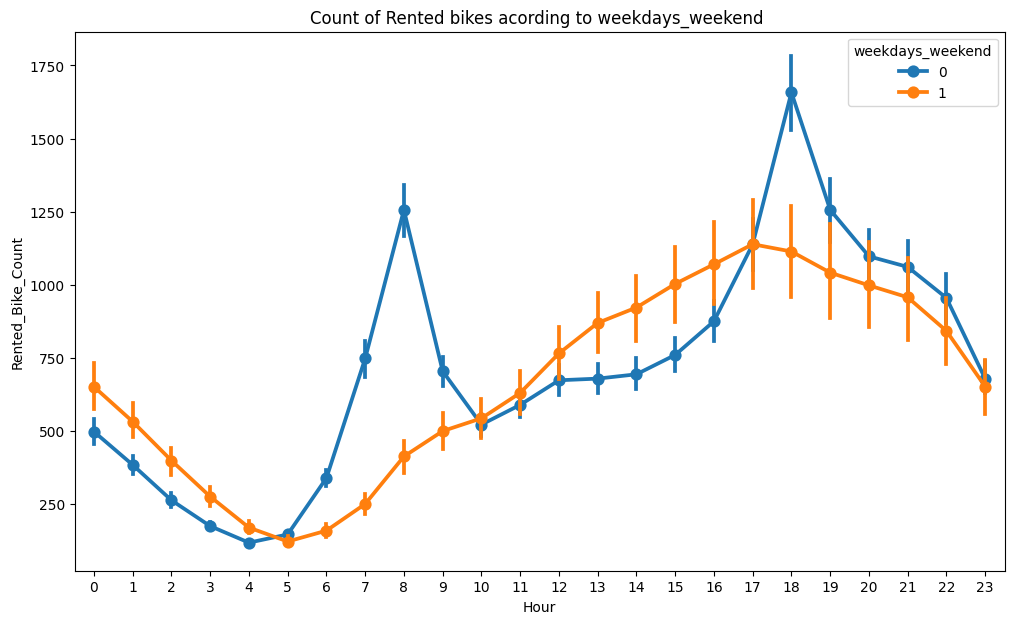

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

* ***From the above point plot and bar plot we can say that, in the week days which represent in blue colur show that the demand of the bike higher because of the office.***
***Peak Time are 7 am to 9 am and 5 pm to 7 pm***
***The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour but when the evening start from 4 pm to 8 pm the demand slightly increases.***   

####Hour

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

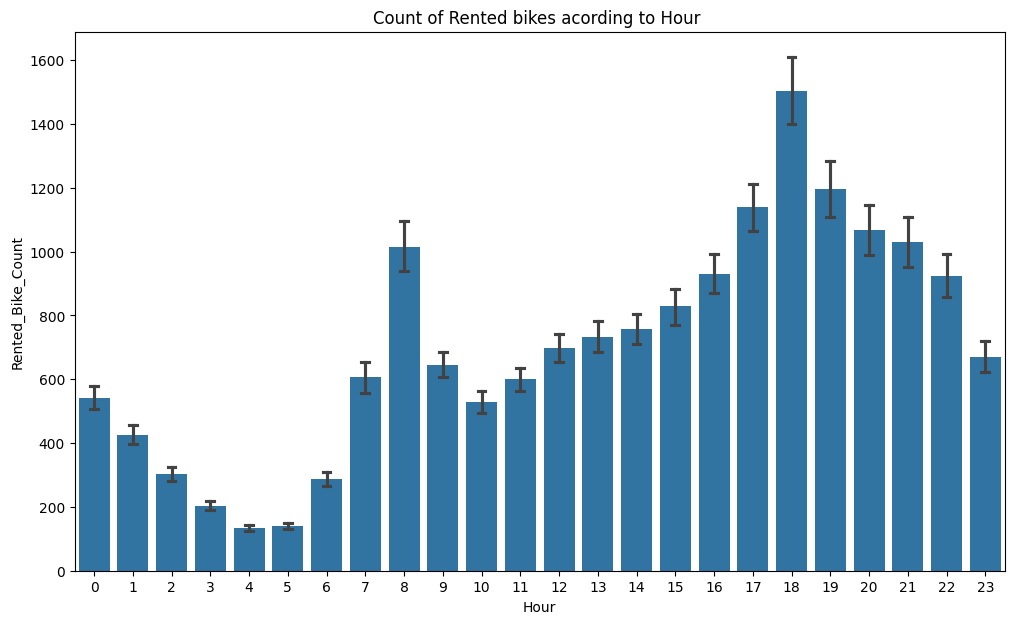

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

* ***In the above plot which shows, the use of rented bike according the hours and the data are from all over the year.***

* ***generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.***   

####Functioning Day

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

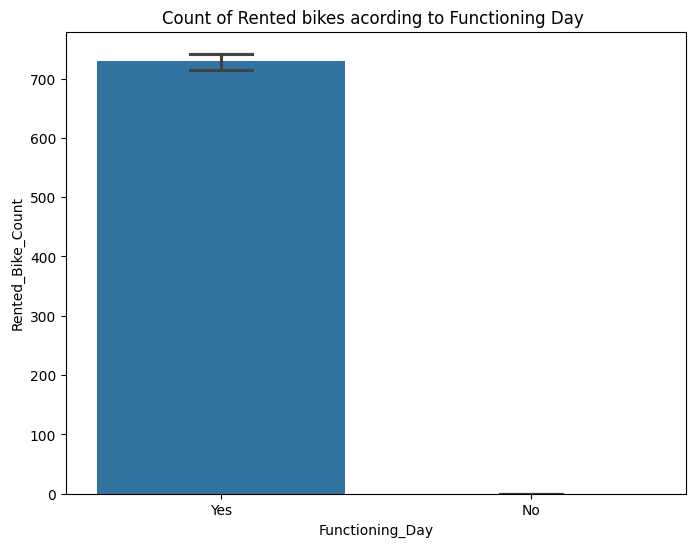

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

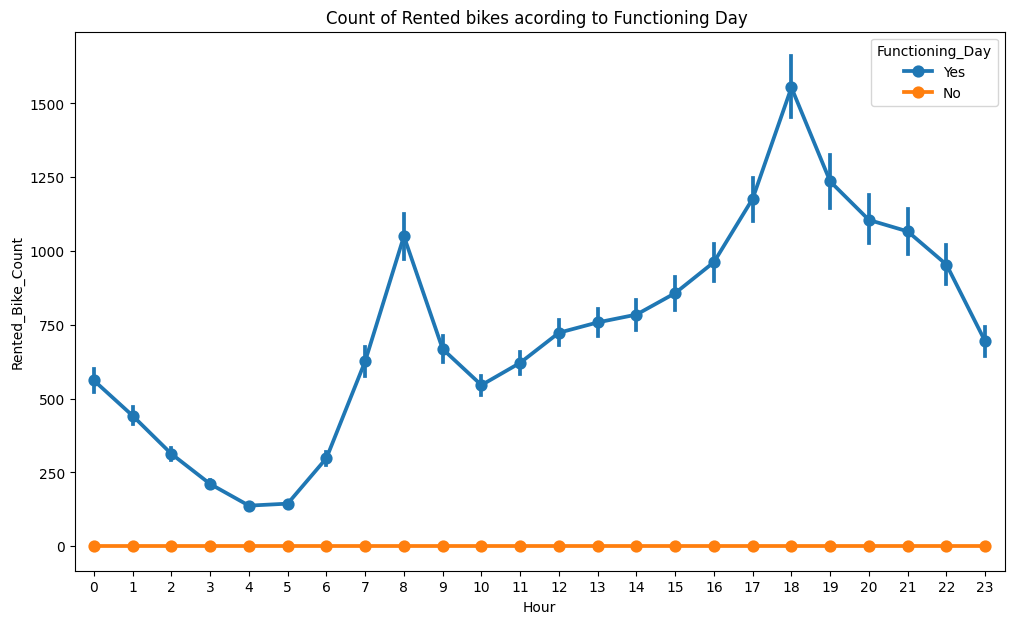

In [ ]:
 #anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

* ***In the above bar plot and point plot which shows the use of rented bike in functioning day or non functioning day, and it clearly shows that,***
* ***Peoples don't use reneted bikes in no functioning day.***

####Seasons

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

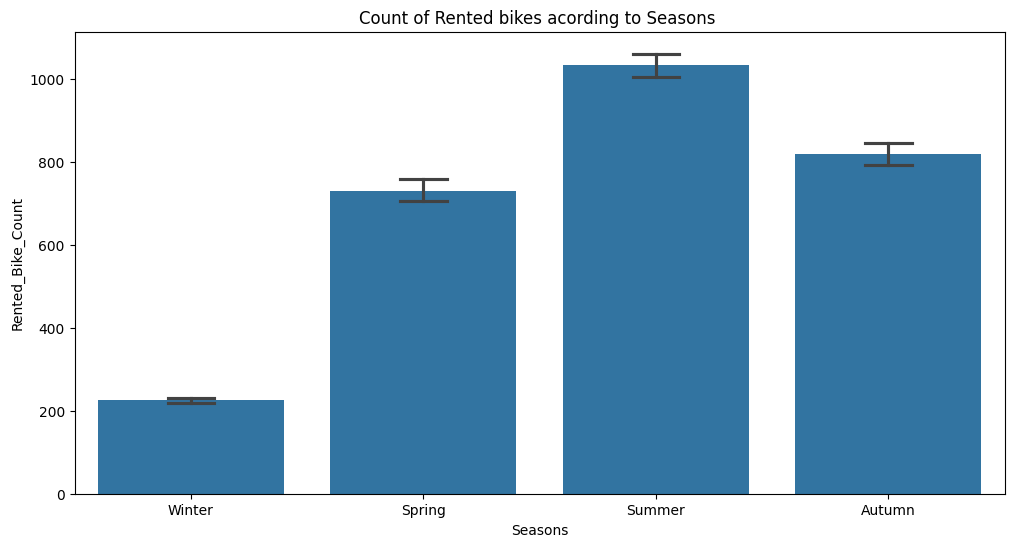

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

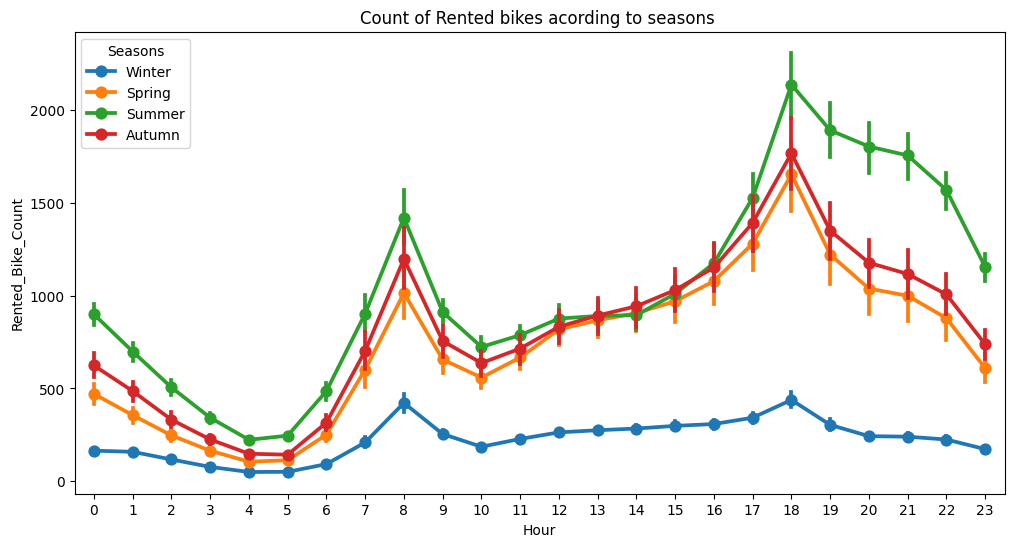

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

* ***In the above bar plot and point plot which shows, the use of rented bike in four different seasons, and it clearly shows that,***
* ***In summer season the use of rented bike is high and peak time is 7am-9am and 5pm-7pm.***
* ***In winter season the use of rented bike is very low maybe because of snowfall, fog, cold etc.***

####Holiday


[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

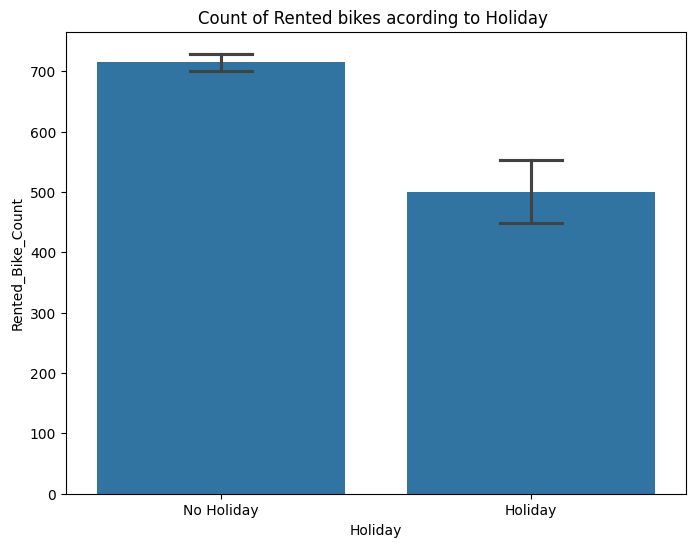

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

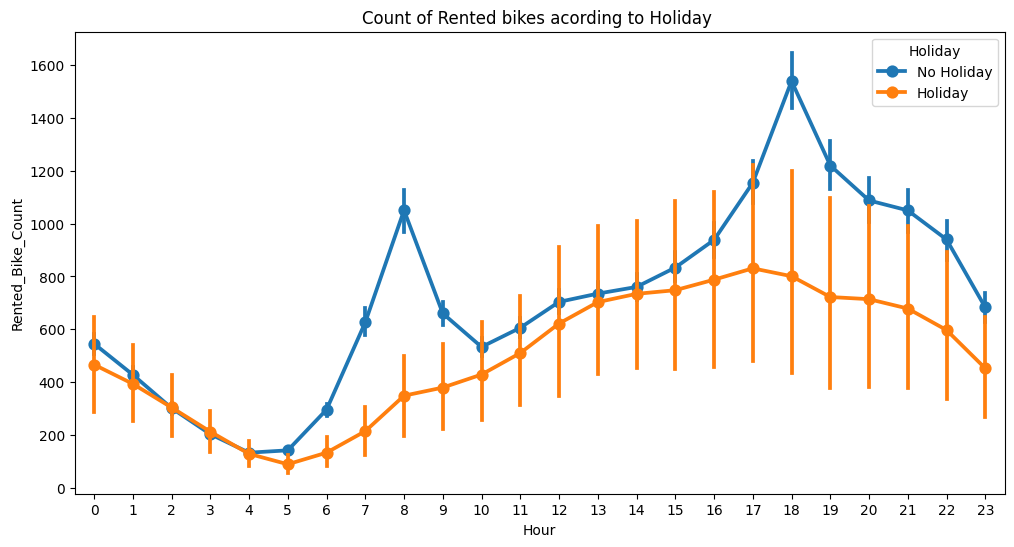

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

* ***In the above bar plot and point plot which shows the use of rented bike in a holiday, and it clearly shows that,***
* ***In holiday, people uses the rented bike from 2pm-8pm***

##**Analyze of Numerical variables**

**What is Numerical Data**

* ***Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.***

##<b> Pays little attention to the skewness of our numerical features

In [ ]:
# separate numerical features from the dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])
numeric_features

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Year,Month,Day
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,12,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,12,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,12,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,12,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,2018,11,30
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,2018,11,30
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,2018,11,30
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,2018,11,30


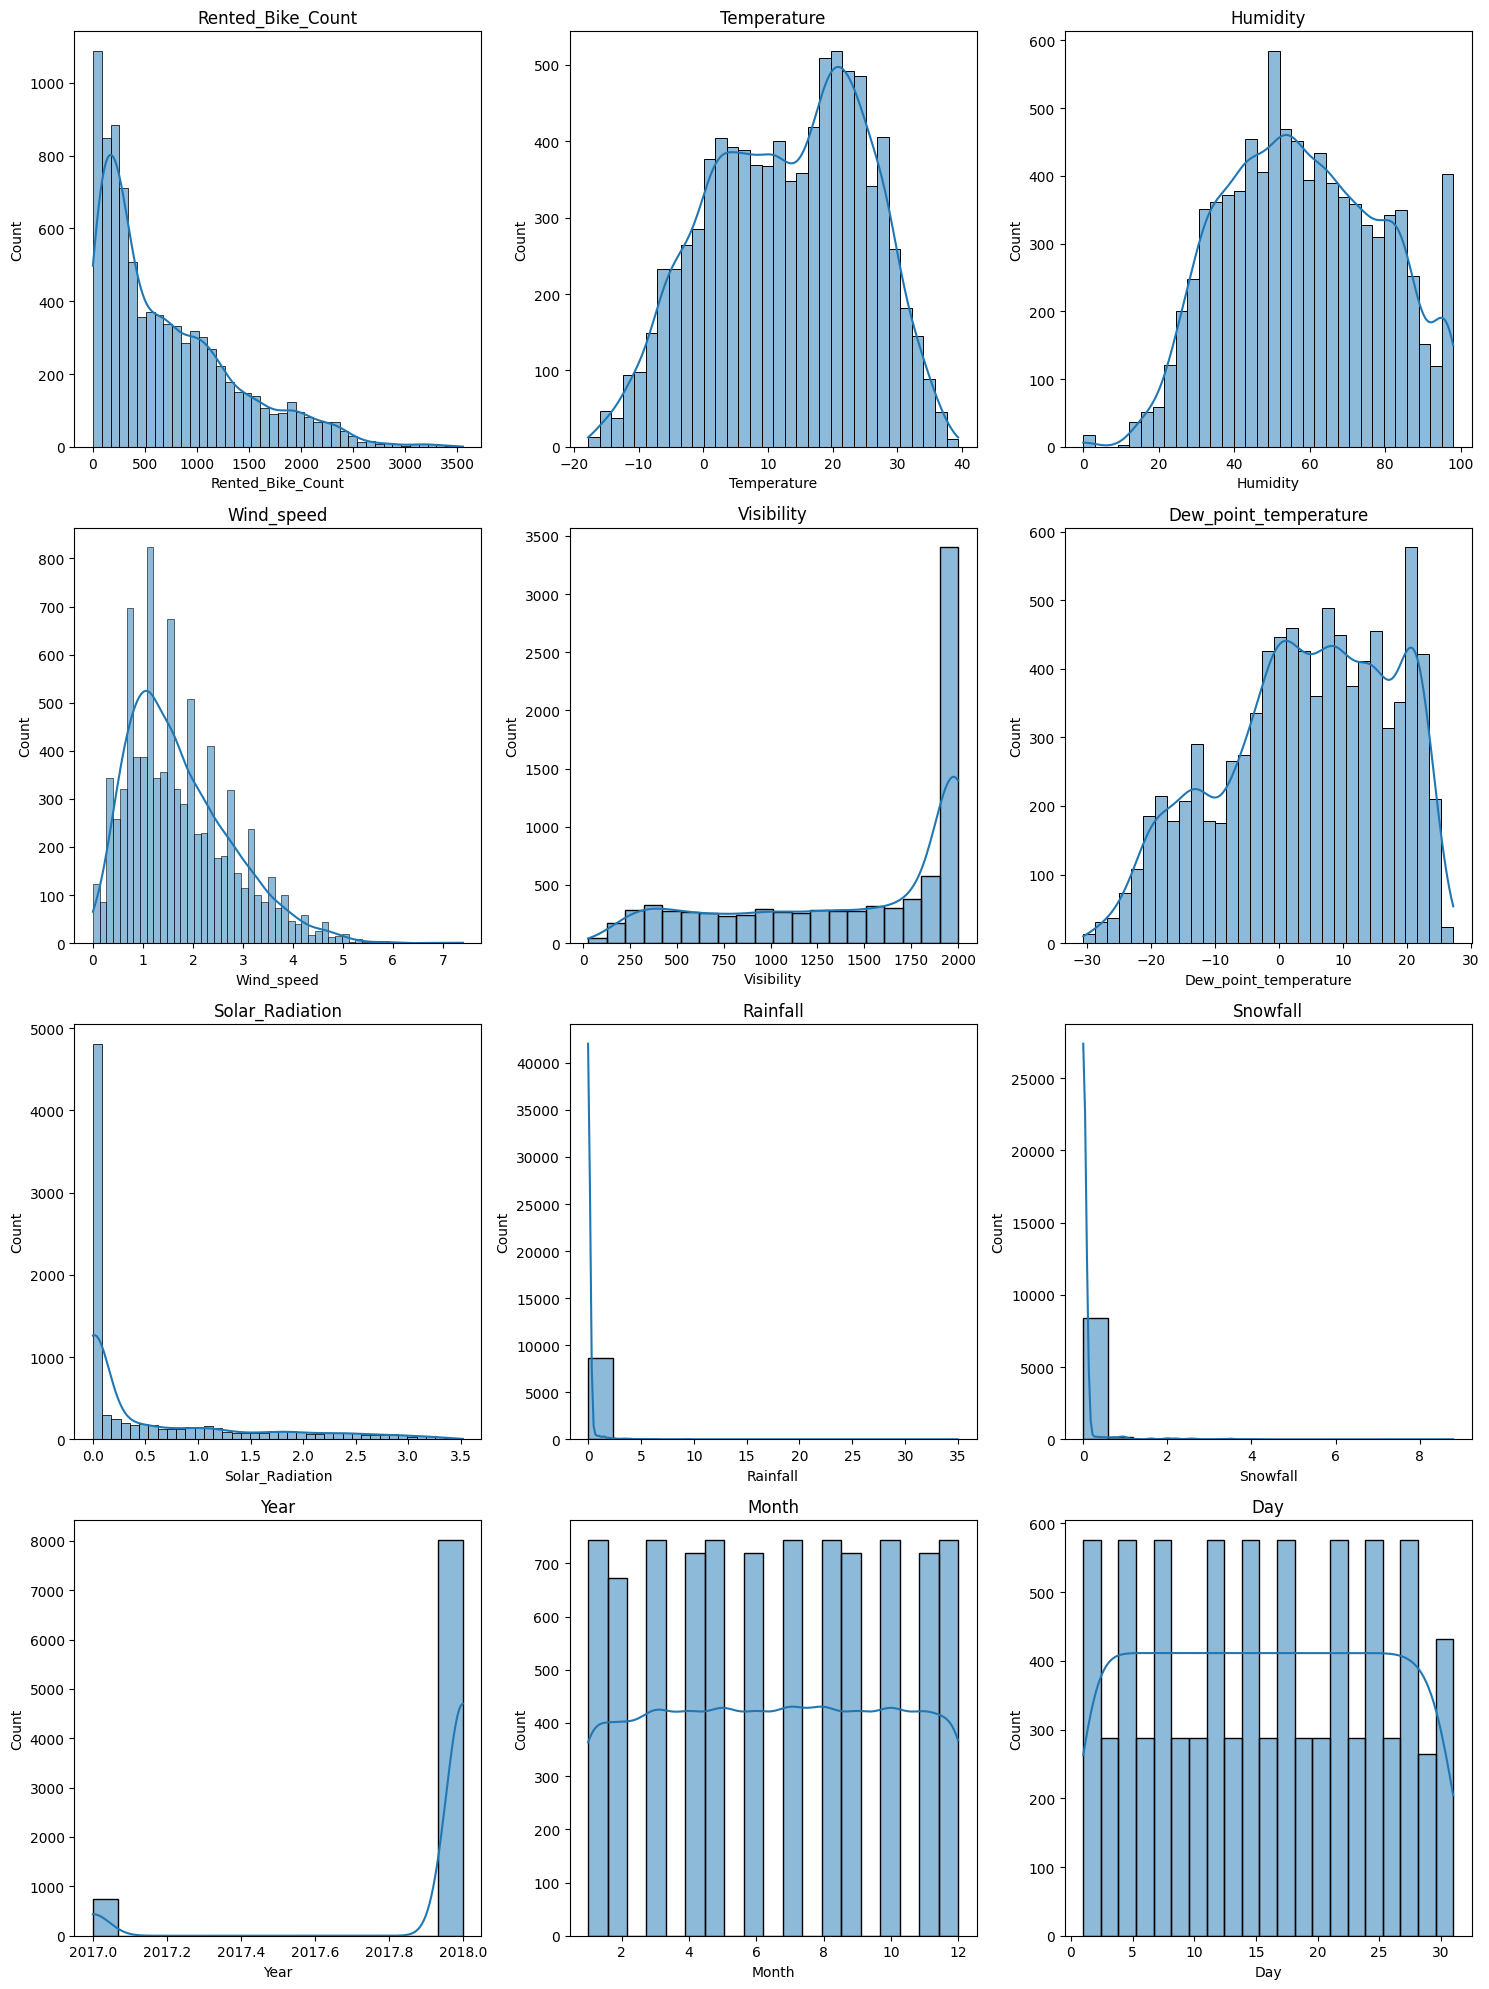

In [ ]:
n = 1
num_features = len(numeric_features.columns)
rows = (num_features + 2) // 3  # Calculate rows needed

plt.figure(figsize=(15, 5 * rows))  # Adjust the figure size based on the number of rows

for i in numeric_features.columns:
    plt.subplot(rows, 3, n)
    sns.histplot(bike_df[i], kde=True)  # Use histplot with KDE (Kernel Density Estimate) for a similar effect
    plt.title(i)
    n += 1

plt.tight_layout()
plt.show()


## Right skewed columns are
Rented Bike Count (Its also our Dependent variable),
Wind speed (m/s),
Solar Radiation (MJ/m2),
Rainfall(mm),
Snowfall (cm),

## Left skewed columns are
Visibility (10m),
Dew point temperature(°C)

##<b> Lets try to find how is the relation of numerical features with our dependent variable

## Numerical VS Rented Bike Count

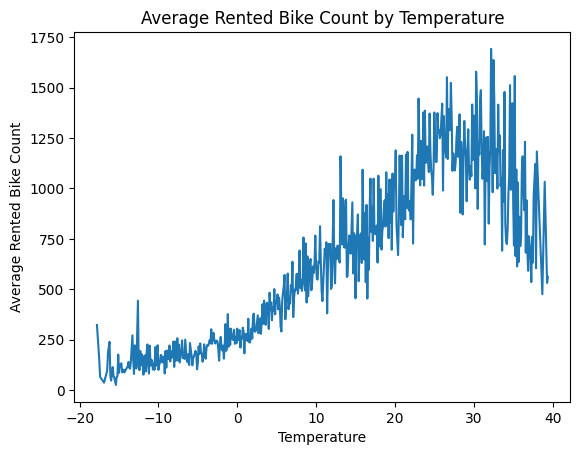

In [ ]:
import matplotlib.pyplot as plt

# Select only the numeric columns for mean calculation
numeric_columns = bike_df.select_dtypes(include=['number']).columns

# Group by "Temperature" and calculate the mean only for numeric columns
mean_values = bike_df.groupby('Temperature')[numeric_columns].mean()

# Now plot the "Rented_Bike_Count" from these mean values
mean_values['Rented_Bike_Count'].plot(kind='line')
plt.title('Average Rented Bike Count by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Average Rented Bike Count')
plt.show()


* ***From the above plot we see that, people like to ride bikes when it is pretty hot around 25°C - 35°C in average***

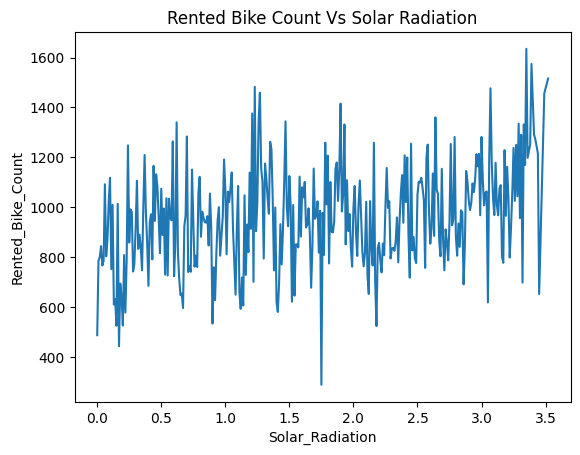

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"

numeric_columns = bike_df.select_dtypes(include=['number']).columns

# Group by "Temperature" and calculate the mean only for numeric columns
mean_values = bike_df.groupby('Solar_Radiation')[numeric_columns].mean()

# Now plot the "Rented_Bike_Count" from these mean values
mean_values['Rented_Bike_Count'].plot(kind='line')
plt.title('Rented Bike Count Vs Solar Radiation')
plt.xlabel('Solar_Radiation')
plt.ylabel('Rented_Bike_Count')
plt.show()



* ***from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the count of rents is around 1000***

### **REGRESSION PLOT**

* ***The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.***

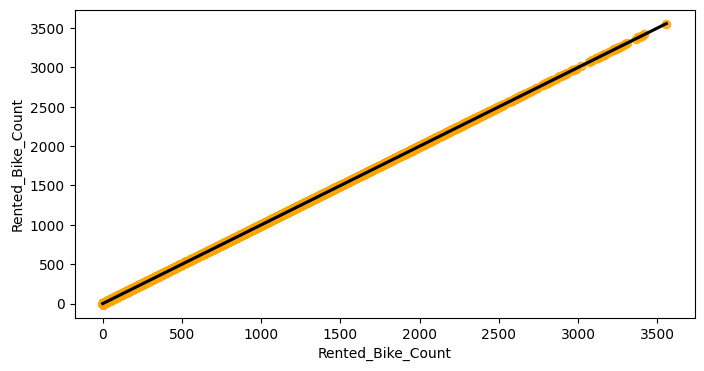

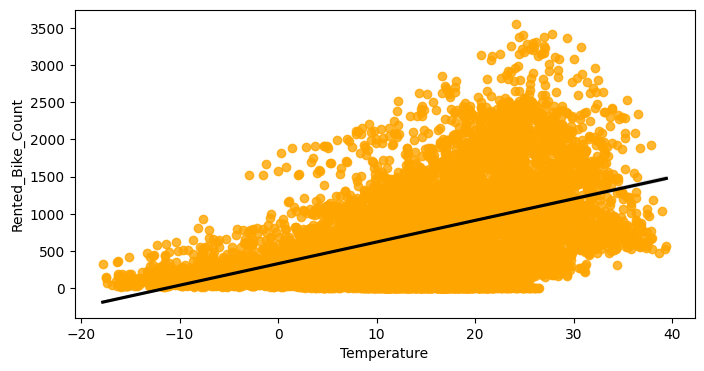

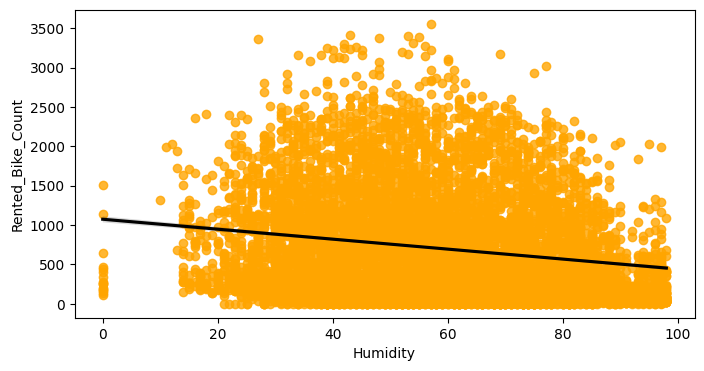

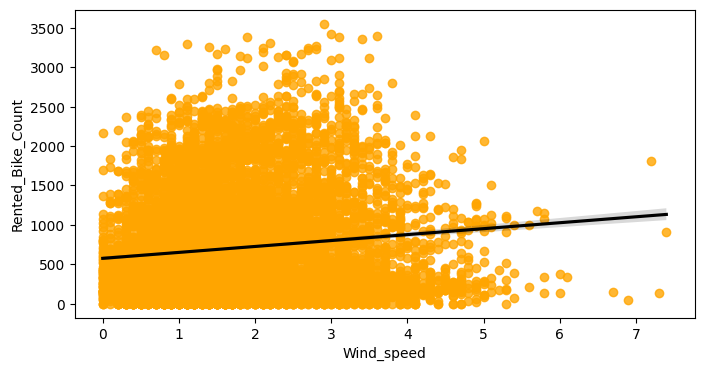

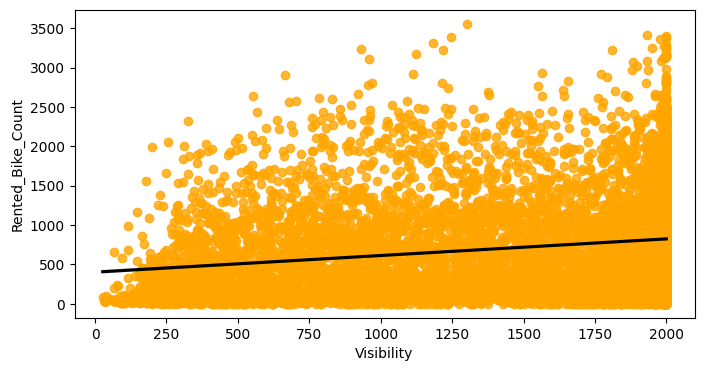

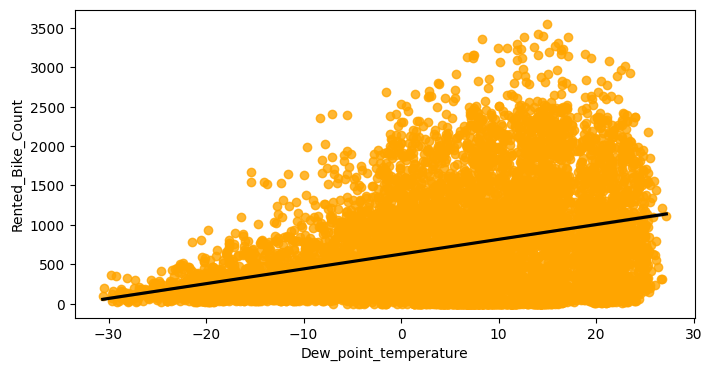

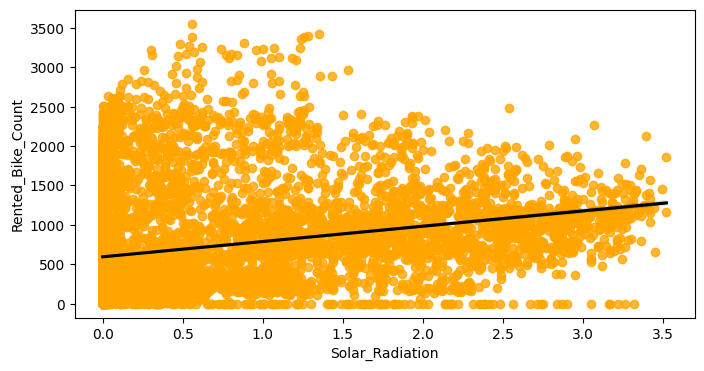

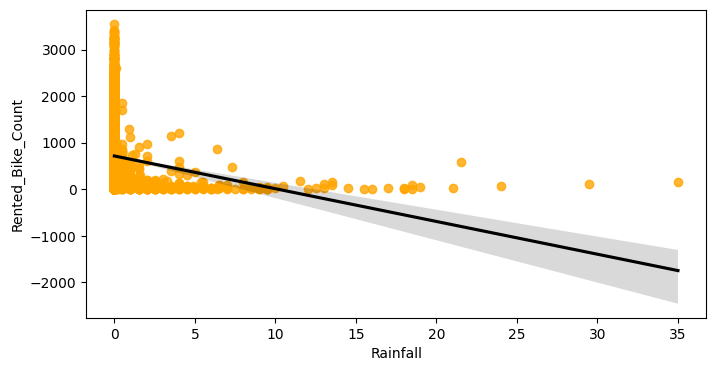

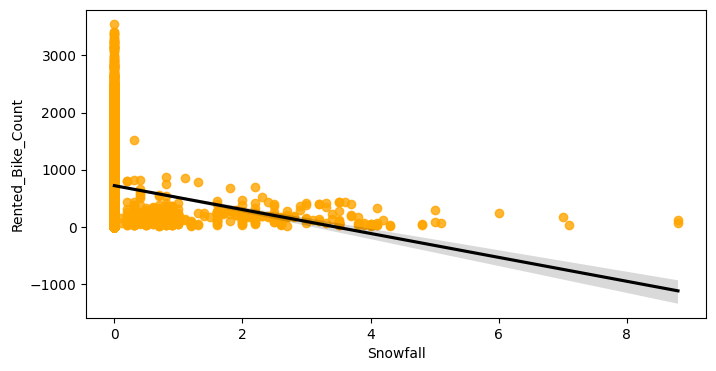

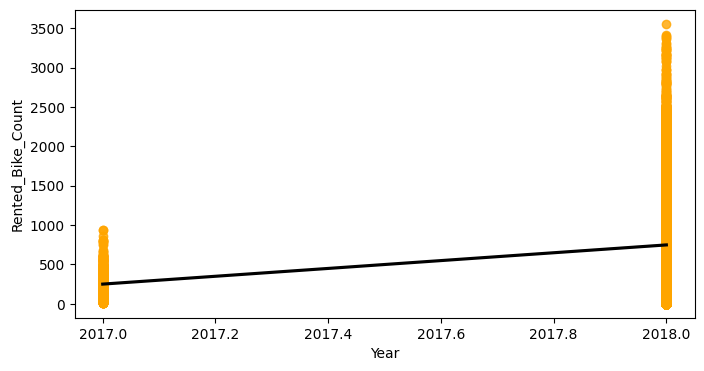

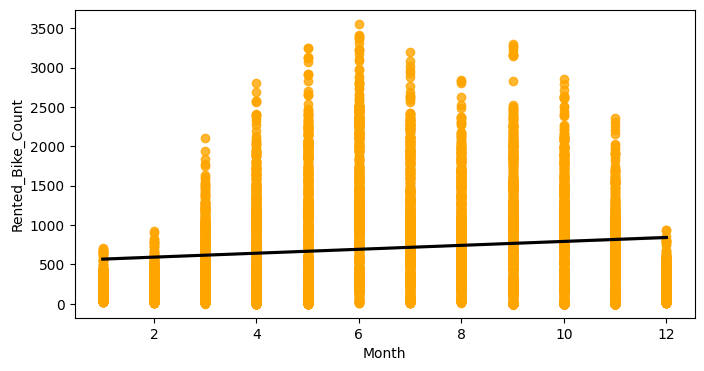

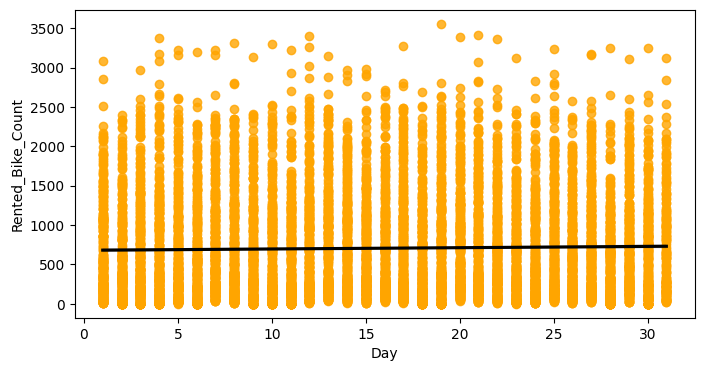

In [ ]:
#printing the regression plot for all the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

* ***From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.***


* ***which means the rented bike count increases with increase of these features.***
* ***'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.***

##**Normalise Rented_Bike_Count column data**

* ***The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data***

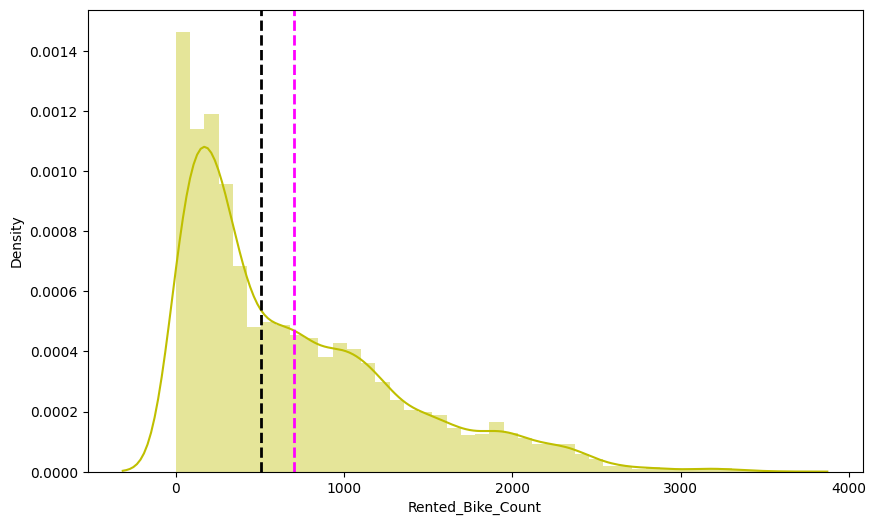

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* ***The above graph shows that, Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.***

**Finding Outliers and treatment**

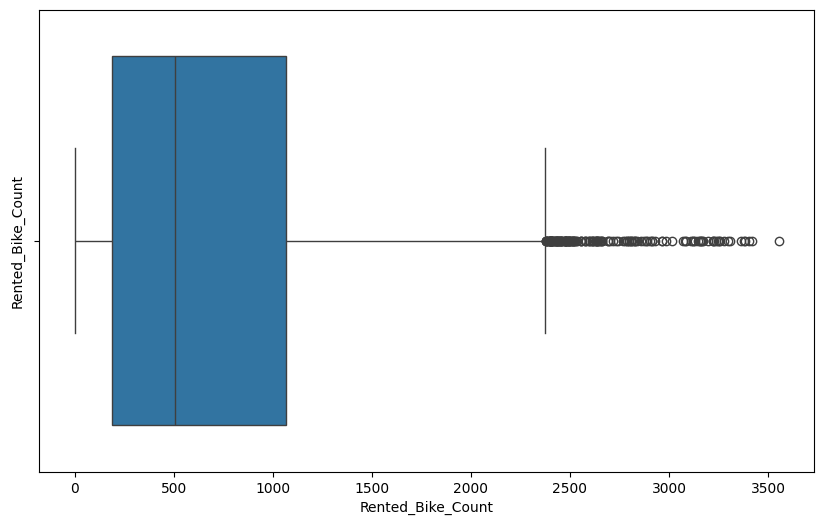

In [ ]:
# Boxplot for Rented bike Count to check outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

In [ ]:
# outliers treatments
bike_df.loc[bike_df['Rainfall']>=4,'Rainfall']= 4
bike_df.loc[bike_df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
bike_df.loc[bike_df['Snowfall']>2,'Snowfall']= 2
bike_df.loc[bike_df['Wind_speed']>=4,'Wind_speed']= 4


we have applied outlier treatment techniques to the dataset by replacing the outliers with the maximum values.

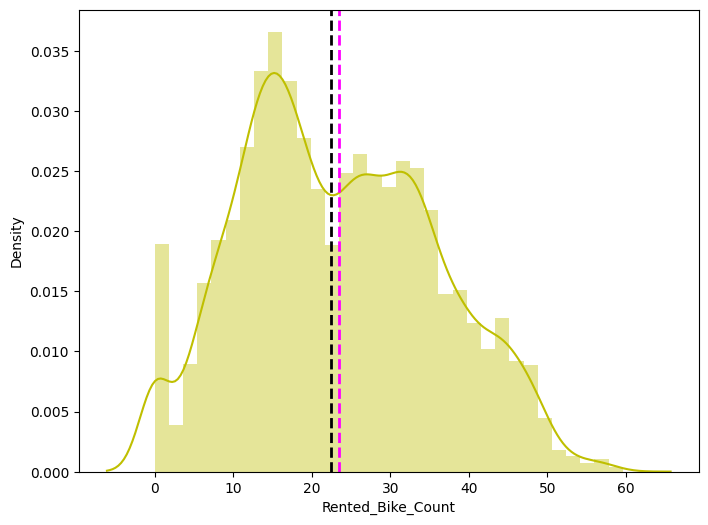

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(8,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

* ***Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.***

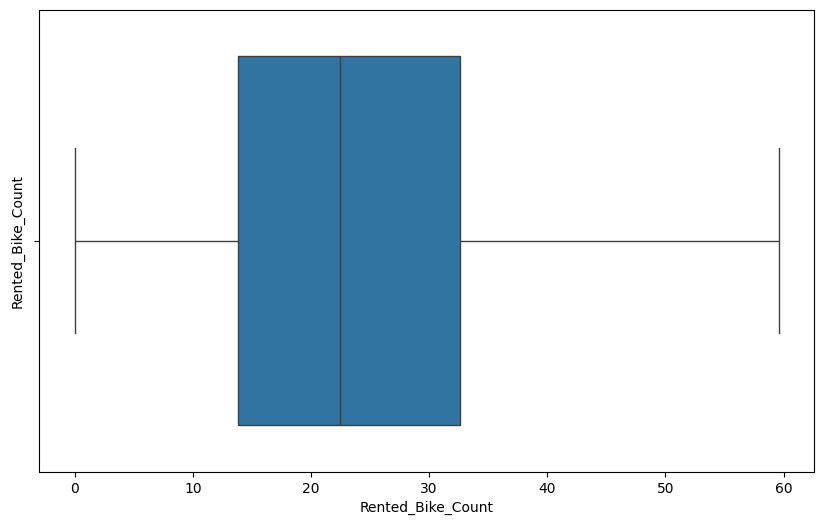

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

* ***After applying Square root to the Rented Bike Count column, we find that there is no outliers present.***

In [ ]:
# Select only numeric columns from the DataFrame
numeric_df = bike_df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


                       Rented_Bike_Count  Temperature  Humidity  Wind_speed  \
Rented_Bike_Count               1.000000     0.538558 -0.199780    0.131549   
Temperature                     0.538558     1.000000  0.159371   -0.031368   
Humidity                       -0.199780     0.159371  1.000000   -0.341432   
Wind_speed                      0.131549    -0.031368 -0.341432    1.000000   
Visibility                      0.199280     0.034794 -0.543090    0.173683   
Dew_point_temperature           0.379788     0.912798  0.536894   -0.174233   
Solar_Radiation                 0.265658     0.350679 -0.467236    0.342995   
Rainfall                       -0.174224     0.061274  0.331631   -0.038813   
Snowfall                       -0.160917    -0.263134  0.087086    0.008140   
Year                            0.215162     0.377796  0.035925   -0.001158   
Month                           0.133514     0.216183  0.139875   -0.158684   
Day                             0.022291     0.01564

##**Checking of Correlation between variables**

###Checking in OLS Model

**Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable**

In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Month,Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,12,0


In [ ]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [ ]:
## fit an OLS model

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     744.3
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:43:09   Log-Likelihood:                -66827.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8751   BIC:                         1.337e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   699.4173    106.562      6.563      0.000     490.531     908.304
Temperature              40.3283      4.160      9.695      0.000      32.175      48.482
Humidity                 -8.5913      1.193     -7.203      0.000     -10.929      -6.253
Wind_speed               62.4552      5.951     10.495      0.000      50.790      74.121
Visibility               -0.0137      0.011     -1.254      0.210      -0.035       0.008
Dew_point_temperature    -5.0068      4.394     -1.139      0.255     -13.621       3.607
Solar_Radiation        -124.1270      9.254    -13.413      0.000    -142.267    -105.987
Rainfall               -162.0914     11.237    -14.425      0.000    -184.118    -140.065
Snowfall                 53.2592     19.061      2.794      0.005      15.895      90.623
==============================================================================
Omnibus:                      965.203   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1618.702
Skew:                           0.770   Prob(JB):                         0.00
Kurtosis:                       4.436   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* **R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is  explained by the model.**
*  **For F statistic , P value is less than 0.05 for 5% levelof significance.**
*  **P value of dew point temp and visibility are very high and they are not significant.**

*  **Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.**
*  **The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems**   
*  **Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.**

In [ ]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.031368,0.034794,0.912798,0.350679,0.061274,-0.263134
Humidity,NaN,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.467236,0.331631,0.087086
Wind_speed,NaN,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.342995,-0.038813,0.008140
Visibility,NaN,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.151105,-0.238378,-0.109306
Dew_point_temperature,NaN,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.090541,0.168386,-0.195743
Solar_Radiation,NaN,0.350679,-0.467236,0.342995,0.151105,0.090541,1.000000,-0.105920,-0.080470
Rainfall,NaN,0.061274,0.331631,-0.038813,-0.238378,0.168386,-0.105920,1.000000,-0.002297
Snowfall,NaN,-0.263134,0.087086,0.008140,-0.109306,-0.195743,-0.080470,-0.002297,1.000000


* ***From the OLS model we find that the 'Temperature' and  'Dew_point_temperature' are highly correlated so we need to drop one of them.***
* ***For droping them we check the (P>|t|) value from above table and we can see that the 'Dew_point_temperature' value is higher so we need to drop Dew_point_temperature column***
* ***For clarity, we use visualisation i.e heatmap in next step***



###**Heatmap**

#### **A correlation Heatmap is a type of graphical representation that displays the correlation matrix, which helps to determine the correlation between different variables.**

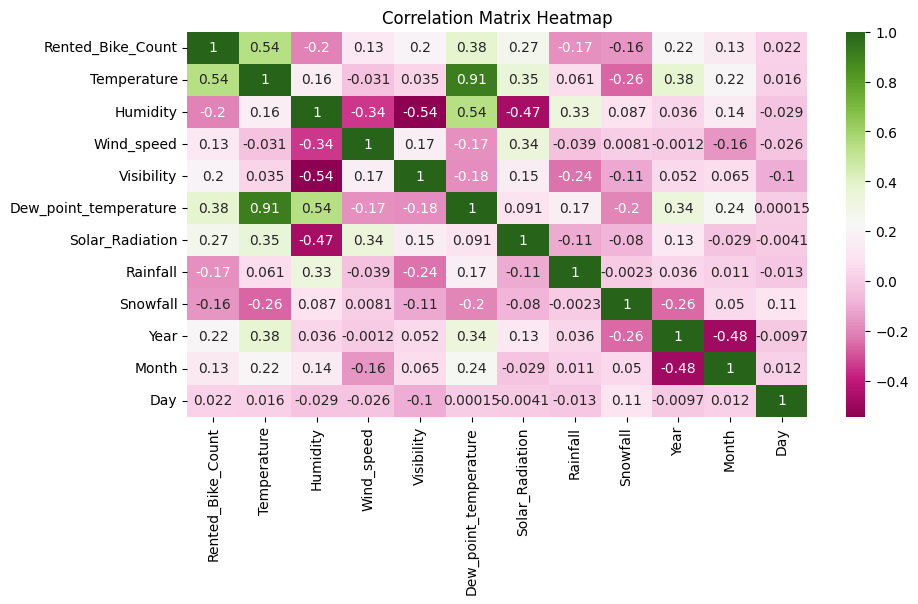

In [ ]:
# Select only numeric columns from the DataFrame
numeric_df = bike_df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, cmap='PiYG', annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


**We can observe on the heatmap that on the target variable line, the most positively correlated variables to the rent are**:
* the temperature
* the dew point temperature
* the solar radiation

**And most negatively correlated variables are**:
* humidity
* rainfall

* ***From the above correlation heatmap, We see that there is a positive
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it won't affect the outcome of our analysis. And they have the same variations, so we can drop the column 'Dew point temperature(°C)'.***

In [ ]:
# drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  Year               8760 non-null   int32   
 13  Month              8760 non-null   int32   
 14  Day                8760 non-null   int32   
 15  month              8760 non-null   category
 16  weekda

## **Feature Engineering & Data Pre-processing**

## Create the dummy variables

**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

###One Hot Encoding

In [ ]:
#Assign all categorical features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

###one hot encoding

**A one hot encoding allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**

In [ ]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Month,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,12,...,False,False,False,False,False,False,False,False,True,False
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,12,...,False,False,False,False,False,False,False,False,True,False
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,12,...,False,False,False,False,False,False,False,False,True,False
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,12,...,False,False,False,False,False,False,False,False,True,False
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,12,...,False,False,False,False,False,False,False,False,True,False


#**Model Training**

##**Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [ ]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [ ]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Month,Day,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,12,1,...,False,False,False,False,False,False,False,False,True,False
1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,12,1,...,False,False,False,False,False,False,False,False,True,False
2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,12,1,...,False,False,False,False,False,False,False,False,True,False
3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,12,1,...,False,False,False,False,False,False,False,False,True,False
4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,12,1,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
y.head()

,Rented_Bike_Count
0,15.937377
1,14.282857
2,13.152946
3,10.344080
4,8.831761


In [ ]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 50)
(2190, 50)


In [ ]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Temperature          8760 non-null   float64
 2   Humidity             8760 non-null   int64  
 3   Wind_speed           8760 non-null   float64
 4   Visibility           8760 non-null   int64  
 5   Solar_Radiation      8760 non-null   float64
 6   Rainfall             8760 non-null   float64
 7   Snowfall             8760 non-null   float64
 8   Year                 8760 non-null   int32  
 9   Month                8760 non-null   int32  
 10  Day                  8760 non-null   int32  
 11  Hour_1               8760 non-null   bool   
 12  Hour_2               8760 non-null   bool   
 13  Hour_3               8760 non-null   bool   
 14  Hour_4               8760 non-null   bool   
 15  Hour_5               8760 non-null   b

In [ ]:
bike_df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Year',
       'Month', 'Day'],
      dtype='object')

* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned}
​
  
* R
2
 =1−
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


# LINEAR REGRESSION

Regression models describe the relationship between variables by fitting a line to the observed data. Linear regression models use a straight line

Linear regression uses a linear approach to model the relationship between independent and dependent variables. In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

$$ \text{y_pred} = \beta_0 + \beta_1x$$

where $$\beta_0 \text{ and } \beta_1$$ are intercept and slope respectively.

In case of multiple features the formula translates into:

$$ \text{y_pred} = \beta_0 + \beta_1x_1 + \beta_2x_2 +\beta_3x_3 +.....$$

where x_1,x_2,x_3 are the features values and
$$\beta_0,\beta_1,\beta_2.....$$
 are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using  a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

1. No multicollinearity in the dataset.

2. Independent variables should show linear relationship with dv.

3. Residual mean should be 0 or close to 0.

4. There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.



Let us now implement our first model.
We will be using LinearRegression from scikit library.


In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [ ]:
#check the score
reg.score(X_train, y_train)

0.7912545265950051

In [ ]:
#check the coefficeint
reg.coef_

array([ 4.69014411e-01, -1.02480084e-01,  1.87014163e-02,  7.07385336e-04,
        9.20286252e-01, -5.11370284e+00, -2.24904719e-01,  1.45276732e+00,
        4.49884505e-01,  1.88503562e-03, -2.18162735e+00, -5.03399429e+00,
       -7.07203620e+00, -9.68702154e+00, -9.28190414e+00, -4.17488317e+00,
        1.99013276e+00,  7.41965991e+00,  1.62152494e+00, -3.02750568e+00,
       -3.02939783e+00, -1.90709710e+00, -2.27865564e+00, -2.40409494e+00,
       -1.09371173e+00,  7.20887196e-01,  4.50314172e+00,  1.07255490e+01,
        7.21454492e+00,  6.19199666e+00,  6.27723434e+00,  5.13058287e+00,
        1.46627929e+00,  6.45783161e-01, -8.03428294e-01, -2.69501947e+00,
        3.41049096e+00,  2.83796743e+01, -1.06820883e+00, -1.28997478e+00,
       -6.74137660e-02,  2.00317170e+00,  4.74945631e+00, -1.46107621e+00,
       -4.09180840e+00,  1.64538061e-01,  2.26769752e+00,  4.20429023e-01,
       -1.45276732e+00, -1.36467067e+00])

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.14485714581406
RMSE : 5.669643476076256
MAE : 4.301322074204594
R2 : 0.7912545265950051
Adjusted R2 : 0.7863750157627237


**Looks like our train set's r2 score value is 0.79 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 31.224776071404957
RMSE : 5.587913391544733
MAE : 4.2612618420785235
R2 : 0.8023328036202642
Adjusted R2 : 0.7977122520452353


**The test set's r2_score is 0.80. This means our linear model is
performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

**Heteroscedasticity**

Heteroscedasticity refers to a situation where the variance of the errors (residuals) is not constant across all levels of the independent variable(s) in a regression model.This violates one of the assumptions of linear regression, which is that the variance of the errors should be constant (homoscedastic) for all levels of the independent variable(s). If the plot shows a funnel shape, with the spread of residuals increasing or decreasing as the predicted values increase, this is an indication of heteroscedasticity.

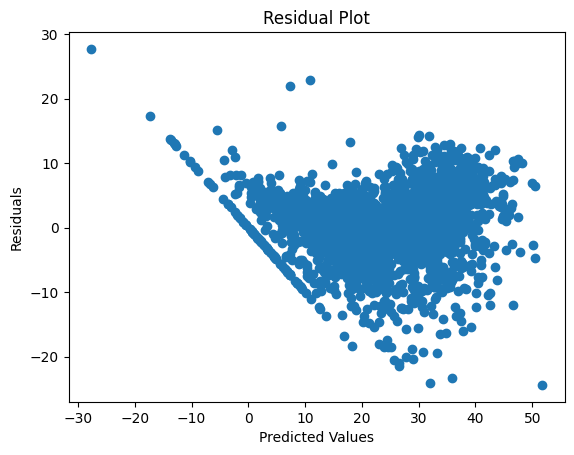

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

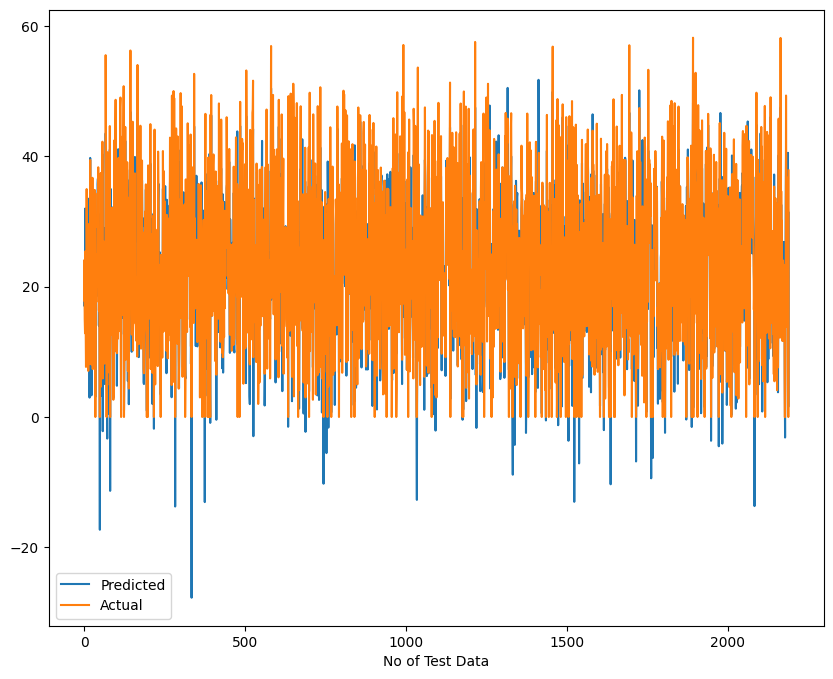

In [ ]:
# Actual Price vs predicte for Linear Regression plot
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## **Ridge and Lasso Regression**

* Ridge and Lasso Regression are types of Regularization techniques
* Regularization techniques are used to deal with overfitting and when the dataset is large
* Ridge and Lasso Regression involve adding penalties to the regression function


#**Lasso Regression**

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.38210974457072644 0.4004711991234293


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 92.3218470064196
RMSE : 9.608425833944892
MAE : 7.269814170384653
R2 : 0.4004711991234293
Adjusted R2 : 0.3864569681538975


**Looks like train set's r2 score value is 0.39 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# Your dictionary with metrics
dict1 = {
    'Model': 'Lasso regression',
    'MAE': round(MAE_l, 3),
    'MSE': round(MSE_l, 3),
    'RMSE': round(RMSE_l, 3),
    'R2_score': round(r2_l, 3),
    'Adjusted R2': round(Adjusted_R2_l, 2)
}

# Convert the dictionary to a DataFrame
dict_df = pd.DataFrame([dict1])

# Use pd.concat to append it to the existing DataFrame
training_df = pd.concat([training_df, dict_df], ignore_index=True)


In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 97.6059013121116
RMSE : 9.879569895097235
MAE : 7.476611890841487
R2 : 0.38210974457072644
Adjusted R2 : 0.3676663070899112


**The test set's r2_score is 0.38. This means our linear model is  not performing well on the data.**

In [ ]:
# Your dictionary with metrics
dict2 = {
    'Model': 'Lasso regression',
    'MAE': round(MAE_l, 3),
    'MSE': round(MSE_l, 3),
    'RMSE': round(RMSE_l, 3),
    'R2_score': round(r2_l, 3),
    'Adjusted R2': round(Adjusted_R2_l, 2),
}

# Convert the dictionary to a DataFrame
dict_df = pd.DataFrame([dict2])

# Use pd.concat to append it to the existing test_df
test_df = pd.concat([test_df, dict_df], ignore_index=True)


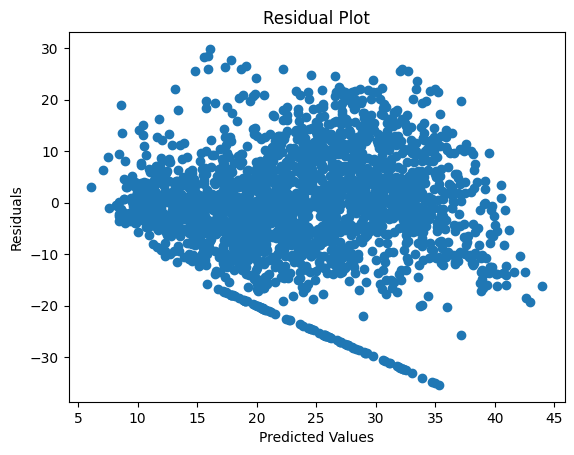

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

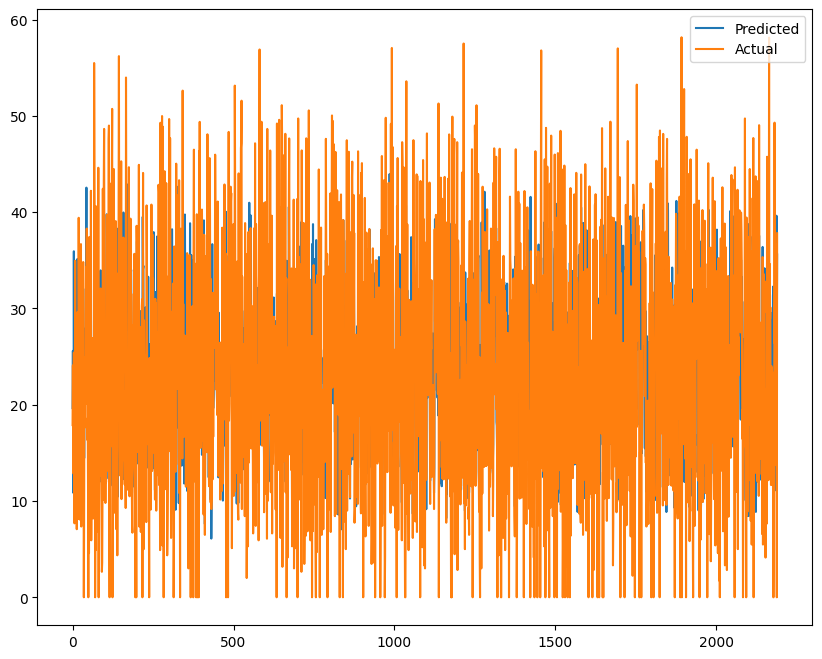

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RIDGE REGRESSION**

Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)

0.7912544528573465

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
y_pred_train_ridge

array([20.63685063, 30.82051924, 19.9523854 , ..., 34.41343366,
       23.28536377, 22.24424117])

In [ ]:
y_pred_test_ridge

array([17.11429335, 23.0998809 , 20.38445726, ..., 40.51868592,
        1.58191182, 31.33797091])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 32.14486850072616
RMSE : 5.669644477454134
MAE : 4.30145547138567
R2 : 0.7912544528573465
Adjusted R2 : 0.7863749403014173


**Looks like our train set's r2 score value is 0.79 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# Your dictionary with metrics
dict1 = {
    'Model': 'Ridge regression',
    'MAE': round(MAE_r, 3),
    'MSE': round(MSE_r, 3),
    'RMSE': round(RMSE_r, 3),
    'R2_score': round(r2_r, 3),
    'Adjusted R2': round(Adjusted_R2_r, 2)
}

# Convert the dictionary to a DataFrame
dict_df = pd.DataFrame([dict1])

# Use pd.concat to append it to the existing training_df
training_df = pd.concat([training_df, dict_df], ignore_index=True)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 31.22617810601689
RMSE : 5.588038842565153
MAE : 4.261520459613736
R2 : 0.8023239280962144
Adjusted R2 : 0.7977031690521802


**The r2_score for the test set is 0.80. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**


In [ ]:


# Your dictionary with metrics
dict1 = {
    'Model': 'Ridge regression',
    'MAE': round(MAE_r, 3),
    'MSE': round(MSE_r, 3),
    'RMSE': round(RMSE_r, 3),
    'R2_score': round(r2_r, 3),
    'Adjusted R2': round(Adjusted_R2_r, 2)
}

# Convert the dictionary to a DataFrame
dict_df = pd.DataFrame([dict1])

# Use pd.concat to append it to the existing training_df
training_df = pd.concat([training_df, dict_df], ignore_index=True)


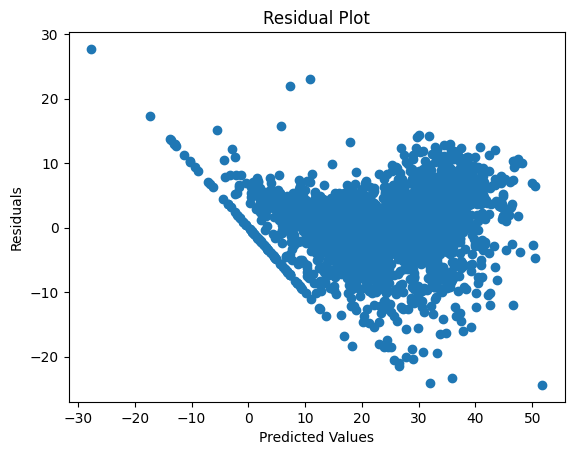

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

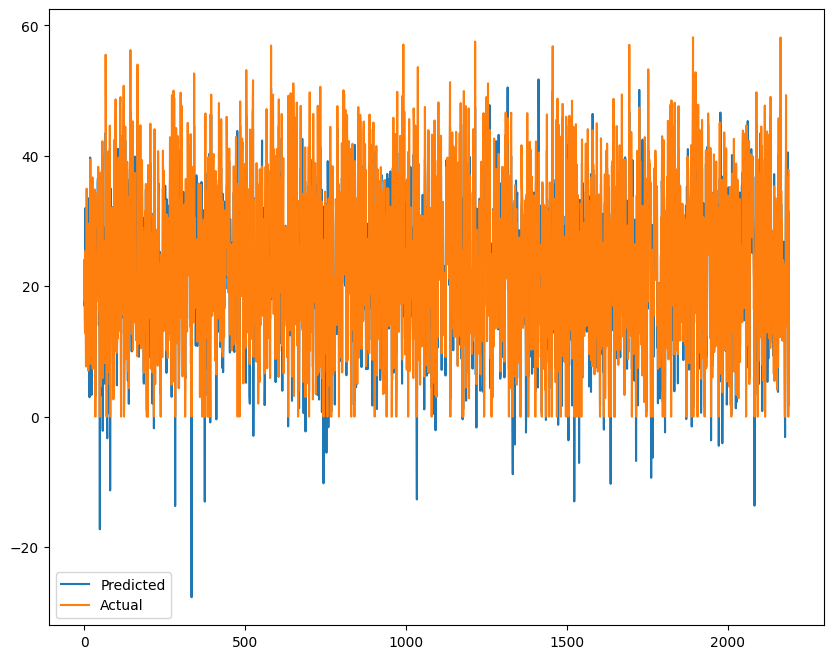

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **ELASTIC NET REGRESSION**

Elastic Net regression is a linear regression model that combines both L1 (Lasso) and L2 (Ridge) regularization penalties to overcome some of the limitations of each individual method.

The model introduces two hyperparameters, alpha and l1_ratio, which control the strength of the L1 and L2 penalties, respectively.
Elastic Net regression is particularly useful when dealing with datasets that have high dimensionality and multicollinearity between features.

In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#check the score
elasticnet.score(X_train, y_train)

0.6442829009200833

In [ ]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
print(y_pred_train_en)
print(y_pred_test_en)

[16.30987919 31.31093672 16.5851913  ... 32.56240151 22.48629375
 19.08187171]
[19.07763113 24.62930045 19.39205791 ... 40.04341091 18.57654154
 32.76620778]


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 54.77711754765985
RMSE : 7.401156500686892
MAE : 5.613831060302218
R2 : 0.6442829009200833
Adjusted R2 : 0.6359678682160179


**Looks like our train set's r2 score value is 0.64 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
import pandas as pd

# Your dictionary with metrics
dict1 = {
    'Model': 'Ridge regression',
    'MAE': round(MAE_r, 3),
    'MSE': round(MSE_r, 3),
    'RMSE': round(RMSE_r, 3),
    'R2_score': round(r2_r, 3),
    'Adjusted R2': round(Adjusted_R2_r, 2)
}

# Convert the dictionary to a DataFrame
dict_df = pd.DataFrame([dict1])

# Use pd.concat to append it to the existing training_df
training_df = pd.concat([training_df, dict_df], ignore_index=True)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 57.47252662506969
RMSE : 7.581063686915557
MAE : 5.720335551141657
R2 : 0.6361724682714087
Adjusted R2 : 0.6276678508864486


**The r2_score for the test set is 0.63. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



In [ ]:
import pandas as pd

# Your dictionary with metrics
dict1 = {
    'Model': 'Ridge regression',
    'MAE': round(MAE_r, 3),
    'MSE': round(MSE_r, 3),
    'RMSE': round(RMSE_r, 3),
    'R2_score': round(r2_r, 3),
    'Adjusted R2': round(Adjusted_R2_r, 2)
}

# Convert the dictionary to a DataFrame
dict_df = pd.DataFrame([dict1])

# Use pd.concat to append it to the existing training_df
training_df = pd.concat([training_df, dict_df], ignore_index=True)


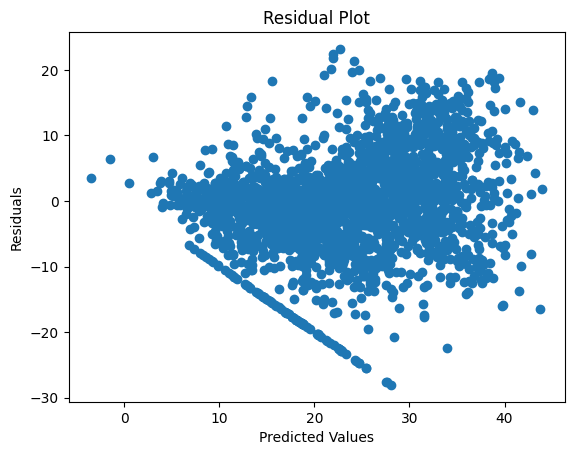

In [ ]:
### Heteroscadacity- Residual plo
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

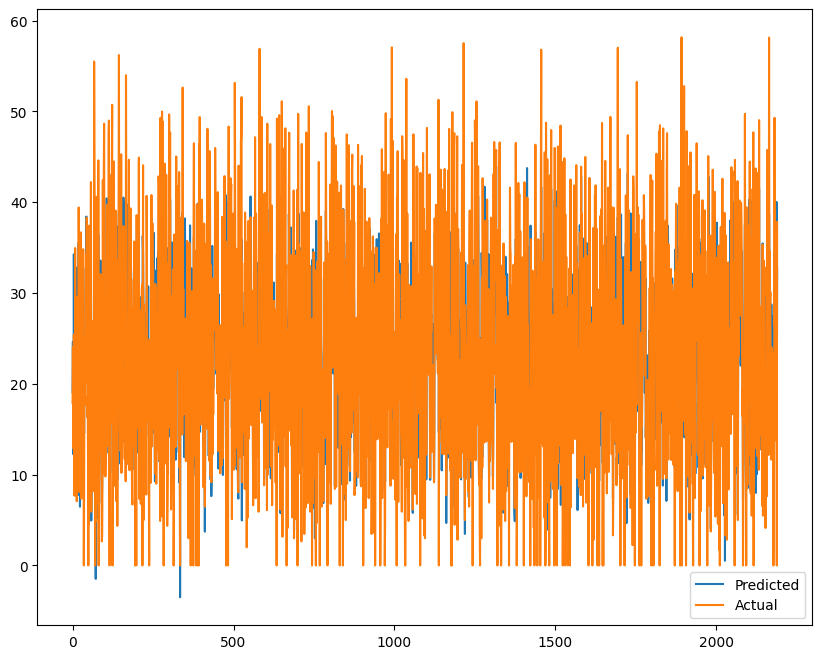

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **DECISION TREE**

---


A decision tree is a type of supervised machine learning algorithm that is commonly used for classification and regression tasks. It works by recursively splitting the data into subsets based on the values of certain attributes, ultimately arriving at a set of decision rules that can be used to classify or predict outcomes for new data.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
print(y_pred_train_d)
print(y_pred_test_d)

[18.17529608 32.90311334 12.31786095 ... 32.90311334 25.56931019
 13.03717095]
[25.56931019 32.90311334 18.85454648 ... 32.90311334  0.
 32.90311334]


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.7029651513344339
MSE : 45.74059797291226
RMSE : 6.763179575681268
MAE : 4.9462060483267
R2 : 0.7029651513344339
Adjusted R2 : 0.6960218402389322


**Looks like our train set's r2 score value is 0.70, that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# Your dictionary with metrics
dict1 = {
    'Model': 'Ridge regression',
    'MAE': round(MAE_r, 3),
    'MSE': round(MSE_r, 3),
    'RMSE': round(RMSE_r, 3),
    'R2_score': round(r2_r, 3),
    'Adjusted R2': round(Adjusted_R2_r, 2)
}

# Convert the dictionary to a DataFrame
dict_df = pd.DataFrame([dict1])

# Use pd.concat to append it to the existing training_df
training_df = pd.concat([training_df, dict_df], ignore_index=True)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 54.77729517900701
RMSE : 7.401168500919771
MAE : 5.325584220403313
R2 : 0.653234523170358
Adjusted R2 : 0.6451287382982298


**The r2_score for the test set is 0.65. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



In [ ]:
# Your dictionary with metrics
dict1 = {
    'Model': 'Ridge regression',
    'MAE': round(MAE_r, 3),
    'MSE': round(MSE_r, 3),
    'RMSE': round(RMSE_r, 3),
    'R2_score': round(r2_r, 3),
    'Adjusted R2': round(Adjusted_R2_r, 2)
}

# Convert the dictionary to a DataFrame
dict_df = pd.DataFrame([dict1])

# Use pd.concat to append it to the existing training_df
training_df = pd.concat([training_df, dict_df], ignore_index=True)


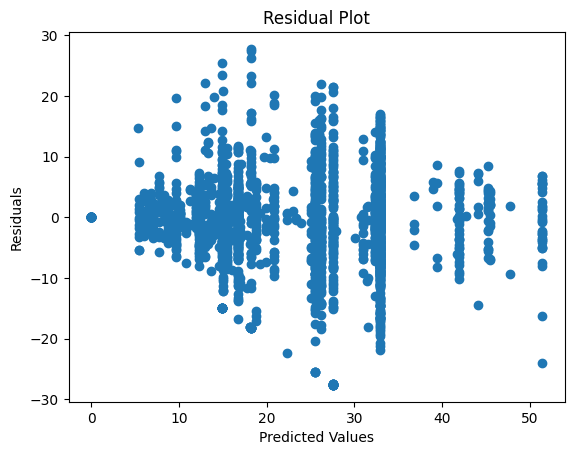

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

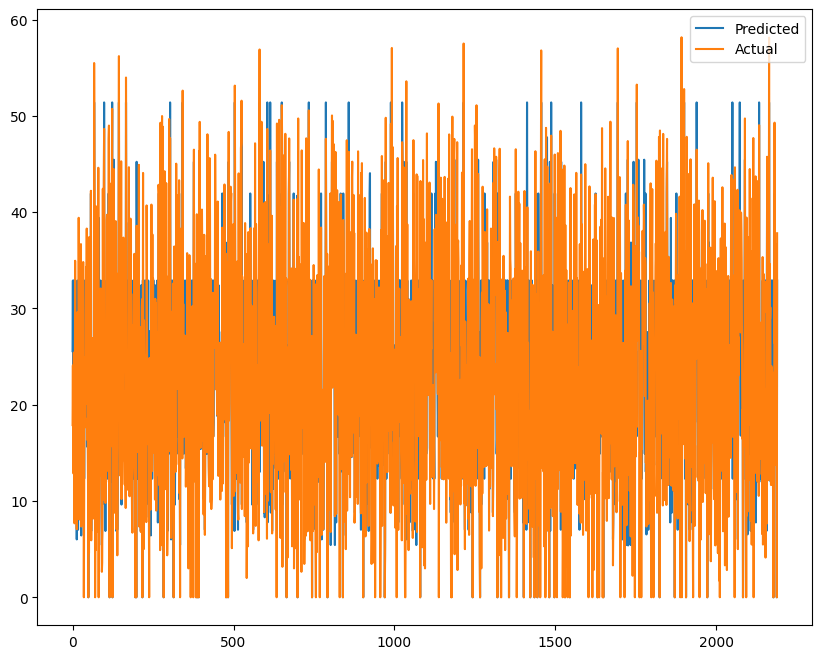

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RANDOM FOREST**

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9898274494857979
MSE : 1.5664779587971565
RMSE : 1.2515901720599905
MAE : 0.7990316801362956
R2 : 0.9898274494857979
Adjusted R2 : 0.9895896619562466


**Looks like our train set's r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**



In [ ]:
# Your dictionary with metrics
dict1 = {
    'Model': 'Ridge regression',
    'MAE': round(MAE_r, 3),
    'MSE': round(MSE_r, 3),
    'RMSE': round(RMSE_r, 3),
    'R2_score': round(r2_r, 3),
    'Adjusted R2': round(Adjusted_R2_r, 2)
}

# Convert the dictionary to a DataFrame
dict_df = pd.DataFrame([dict1])

# Use pd.concat to append it to the existing training_df
training_df = pd.concat([training_df, dict_df], ignore_index=True)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.210788405030595
RMSE : 3.494393853736381
MAE : 2.1631722323863087
R2 : 0.9227000922572195
Adjusted R2 : 0.9208931752926851


**The r2_score for the test set is 0.92. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



In [ ]:
# Your dictionary with metrics
dict1 = {
    'Model': 'Ridge regression',
    'MAE': round(MAE_r, 3),
    'MSE': round(MSE_r, 3),
    'RMSE': round(RMSE_r, 3),
    'R2_score': round(r2_r, 3),
    'Adjusted R2': round(Adjusted_R2_r, 2)
}

# Convert the dictionary to a DataFrame
dict_df = pd.DataFrame([dict1])

# Use pd.concat to append it to the existing training_df
training_df = pd.concat([training_df, dict_df], ignore_index=True)


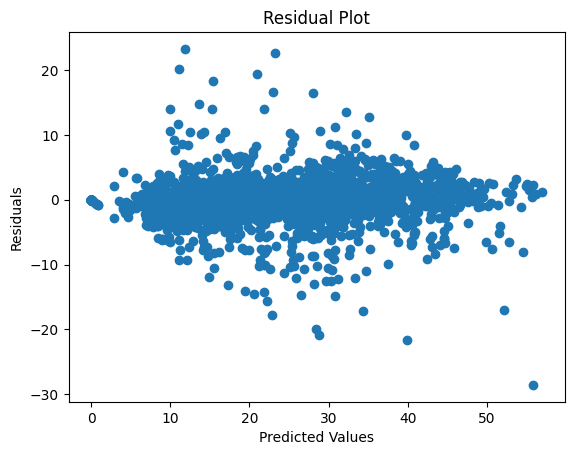

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
rf_model.feature_importances_

array([3.09425366e-01, 1.56964135e-01, 1.02320432e-02, 1.08275585e-02,
       3.25719143e-02, 3.26409994e-02, 9.99842209e-04, 3.47175629e-04,
       1.24824302e-02, 1.03172547e-02, 4.23398053e-03, 1.26281270e-02,
       1.95094809e-02, 2.81586486e-02, 2.43494107e-02, 7.57226138e-03,
       4.19641744e-03, 1.41823252e-02, 1.16740342e-03, 2.07709268e-03,
       1.18126212e-03, 2.80970821e-04, 2.39878493e-04, 3.78189558e-04,
       1.41179742e-03, 3.65211726e-03, 1.02779632e-02, 3.04983294e-02,
       1.76649806e-02, 1.21755148e-02, 1.36649169e-02, 1.05435522e-02,
       3.80774224e-03, 1.21627801e-03, 7.88565035e-04, 1.00318828e-02,
       3.55507762e-03, 1.51843542e-01, 1.70334378e-04, 1.30446485e-03,
       7.57760435e-04, 1.06045466e-03, 2.06090343e-03, 4.22385284e-04,
       1.99341895e-03, 5.51017967e-04, 1.16741123e-03, 3.96808700e-03,
       3.37975702e-04, 1.81093588e-02])

## FEATURES STORED

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.16
37,Functioning_Day_Yes,0.15
4,Solar_Radiation,0.03
5,Rainfall,0.03
27,Hour_18,0.03
13,Hour_4,0.03
12,Hour_3,0.02
28,Hour_19,0.02
14,Hour_5,0.02


In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

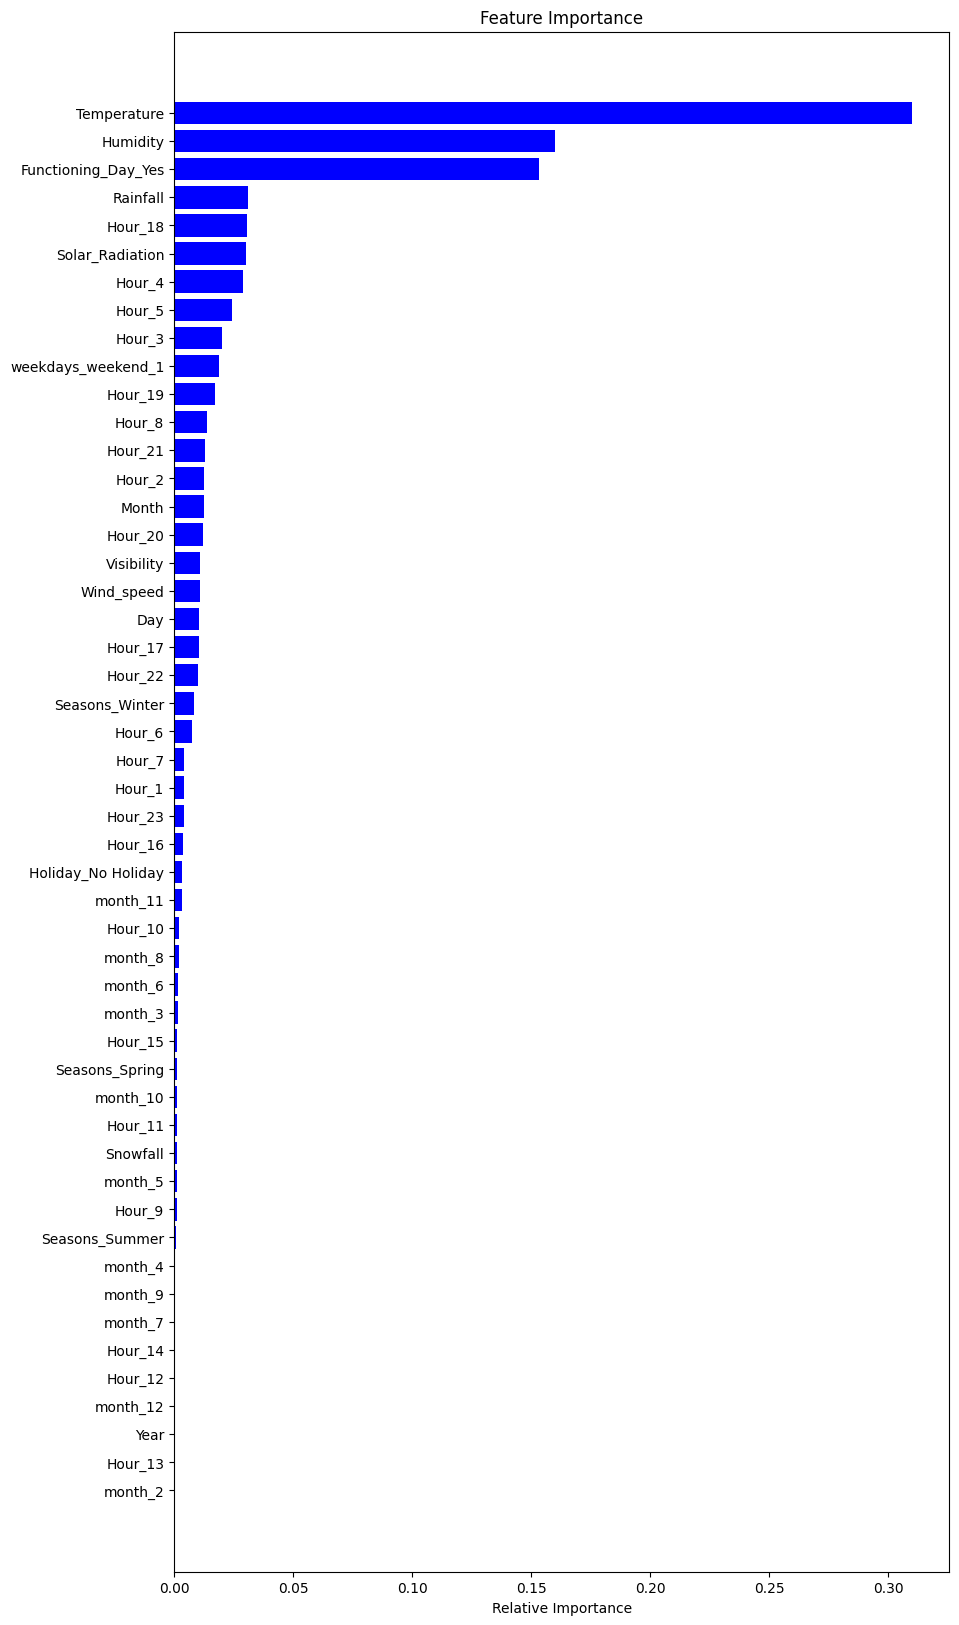

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **GRADIENT BOOSTING**

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.880761902266503
MSE : 18.361555608660026
RMSE : 4.285038577266257
MAE : 3.2185155874448994
R2 : 0.880761902266503
Adjusted R2 : 0.8779746629552945


**Looks like our train set's r2 score value is 0.87 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# Your dictionary with metrics
dict1 = {
    'Model': 'Ridge regression',
    'MAE': round(MAE_r, 3),
    'MSE': round(MSE_r, 3),
    'RMSE': round(RMSE_r, 3),
    'R2_score': round(r2_r, 3),
    'Adjusted R2': round(Adjusted_R2_r, 2)
}

# Convert the dictionary to a DataFrame
dict_df = pd.DataFrame([dict1])

# Use pd.concat to append it to the existing training_df
training_df = pd.concat([training_df, dict_df], ignore_index=True)


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 20.740731972443292
RMSE : 4.554199377765898
MAE : 3.4290601466375983
R2 : 0.8687016255783209
Adjusted R2 : 0.8656324723660329


**The r2_score for the test set is 0.86. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**



In [ ]:
# Your dictionary with metrics
dict1 = {
    'Model': 'Ridge regression',
    'MAE': round(MAE_r, 3),
    'MSE': round(MSE_r, 3),
    'RMSE': round(RMSE_r, 3),
    'R2_score': round(r2_r, 3),
    'Adjusted R2': round(Adjusted_R2_r, 2)
}

# Convert the dictionary to a DataFrame
dict_df = pd.DataFrame([dict1])

# Use pd.concat to append it to the existing training_df
training_df = pd.concat([training_df, dict_df], ignore_index=True)


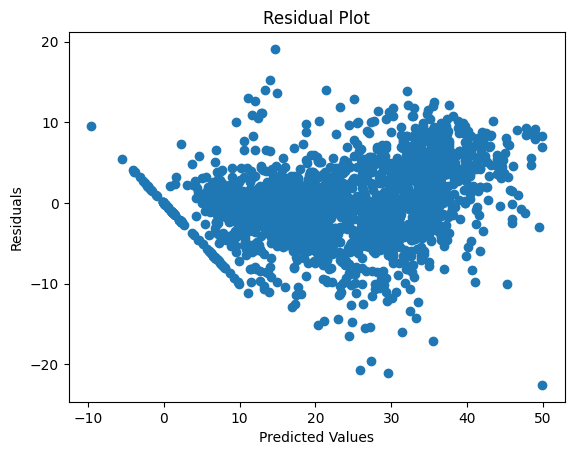

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
gb_model.feature_importances_

array([3.10426006e-01, 1.30046230e-01, 1.61319376e-04, 1.65515285e-03,
       4.97385219e-02, 6.45822677e-02, 0.00000000e+00, 0.00000000e+00,
       1.58547304e-02, 9.12629792e-04, 2.77076765e-04, 5.78970779e-03,
       1.41977881e-02, 2.61760061e-02, 2.03910951e-02, 5.43683615e-03,
       1.50571492e-03, 9.09278140e-03, 0.00000000e+00, 3.07413460e-03,
       1.62808563e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.73909079e-04, 7.50940892e-03, 2.97721012e-02,
       1.81612531e-02, 1.10012234e-02, 1.69038495e-02, 1.31249031e-02,
       3.63850382e-04, 9.22490189e-06, 3.80916355e-05, 3.64153382e-02,
       3.36892597e-03, 1.73041942e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.36821723e-03, 0.00000000e+00,
       2.45813250e-03, 0.00000000e+00, 4.40776166e-03, 2.42873553e-03,
       0.00000000e+00, 1.74070475e-02])

## FEATURES STORED

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.13
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.05


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
37,Functioning_Day_Yes,0.17
1,Humidity,0.13
5,Rainfall,0.06
4,Solar_Radiation,0.05
35,Seasons_Winter,0.04
13,Hour_4,0.03
27,Hour_18,0.03
30,Hour_21,0.02
28,Hour_19,0.02


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

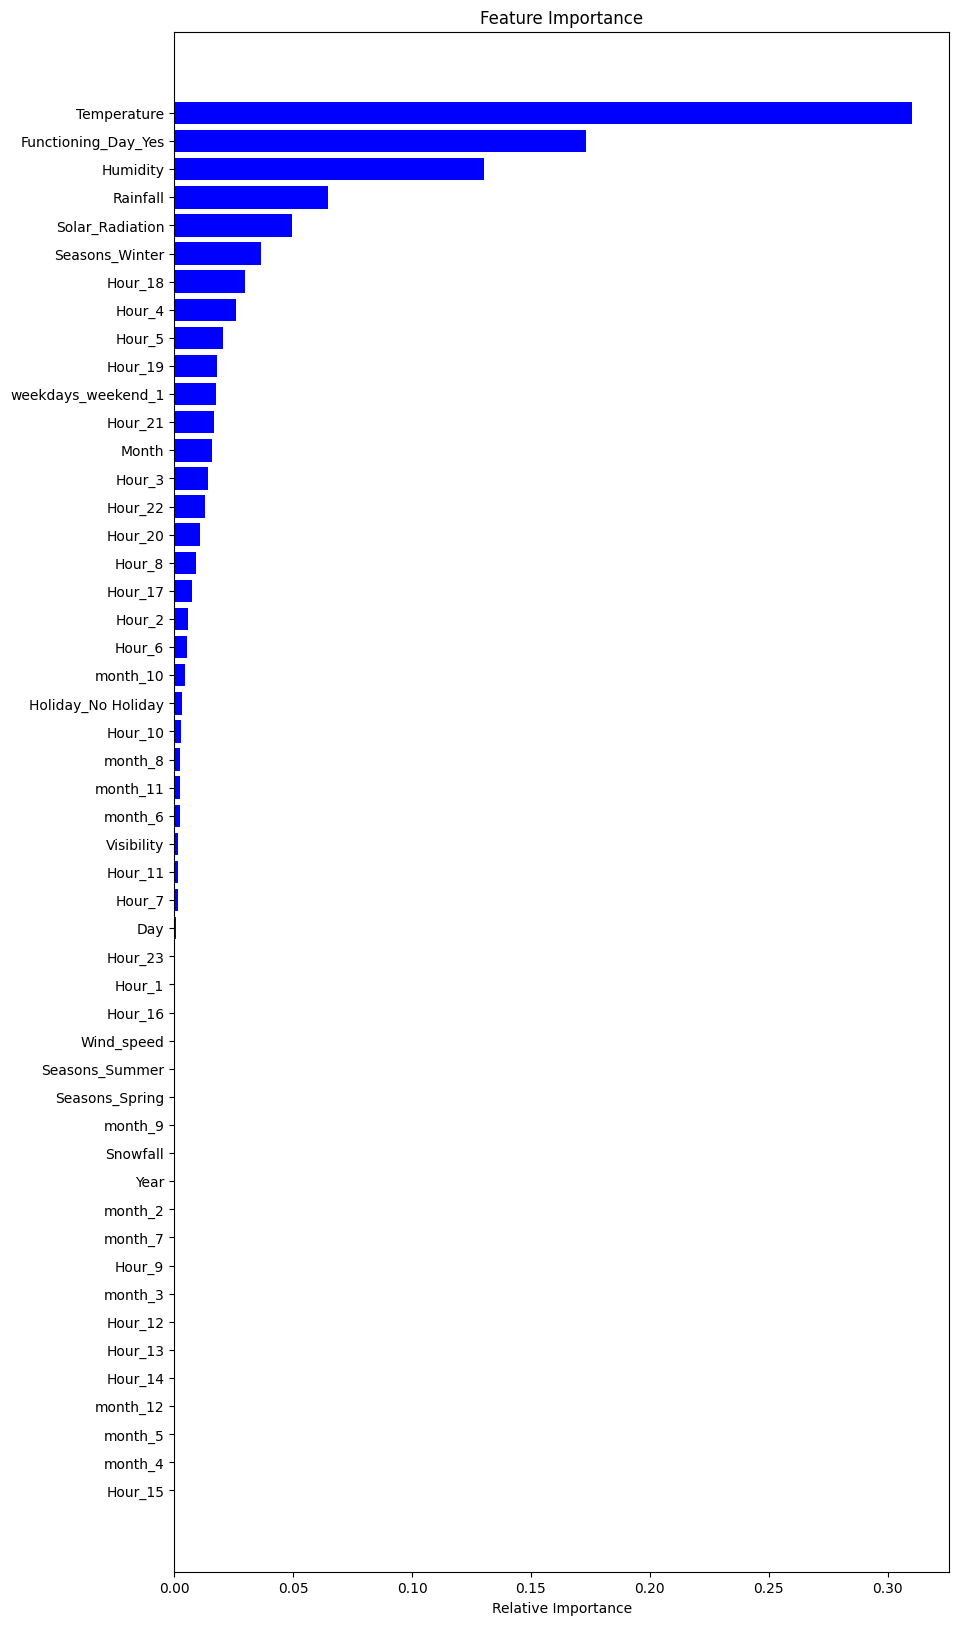

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#**Hyperparameter tuning**

Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

<b> Using GridSearchCV

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

##**Gradient Boosting Regressor with GridSearchCV**

### **Provide the range of values for chosen hyperparameters**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

### **Importing Gradient Boosting Regressor**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
param_dict = {'learning_rate': [0.1, 0.01],
              'n_estimators': [50, 100],
              'max_depth': [3, 5]}

gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid=param_dict,
                       cv=3, verbose=2, n_jobs=-1)

gb_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=5)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9434043814286663
MSE : 8.715197720838201
RMSE : 2.9521513715997356
MAE : 2.108732063231027
R2 : 0.9434043814286663
Adjusted R2 : 0.9420814356930111


**Looks like our train set's r2 score value is 0.94 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# Your dictionary with metrics
dict1 = {
    'Model': 'Ridge regression',
    'MAE': round(MAE_r, 3),
    'MSE': round(MSE_r, 3),
    'RMSE': round(RMSE_r, 3),
    'R2_score': round(r2_r, 3),
    'Adjusted R2': round(Adjusted_R2_r, 2)
}

# Convert the dictionary to a DataFrame
dict_df = pd.DataFrame([dict1])

# Use pd.concat to append it to the existing training_df
training_df = pd.concat([training_df, dict_df], ignore_index=True)


In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 13.21710298906371
RMSE : 3.6355333843968083
MAE : 2.5639617652038966
R2 : 0.9163296580210544
Adjusted R2 : 0.9143738295502983


Hyperparameter tunning certainly showed a better result, r2 was 0.91 on test and mae and rmse was lowered. Overall model show good result.

In [ ]:

# Your dictionary with metrics
dict1 = {
    'Model': 'Ridge regression',
    'MAE': round(MAE_r, 3),
    'MSE': round(MSE_r, 3),
    'RMSE': round(RMSE_r, 3),
    'R2_score': round(r2_r, 3),
    'Adjusted R2': round(Adjusted_R2_r, 2)
}

# Convert the dictionary to a DataFrame
dict_df = pd.DataFrame([dict1])

# Use pd.concat to append it to the existing training_df
training_df = pd.concat([training_df, dict_df], ignore_index=True)


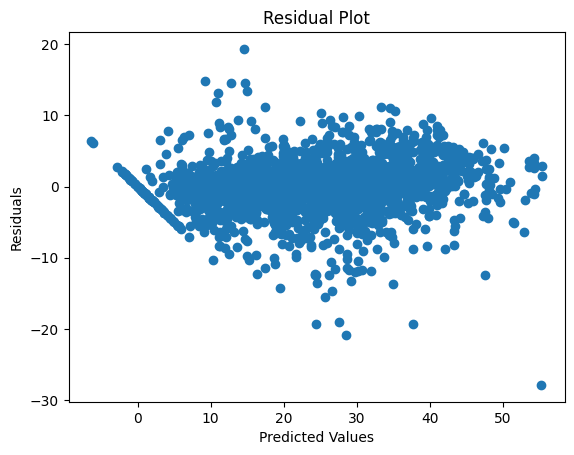

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
gb_optimal_model.feature_importances_

array([3.08052821e-01, 1.57974247e-01, 2.38323063e-03, 4.78753332e-03,
       3.73565676e-02, 4.23259552e-02, 8.76689187e-04, 7.97476136e-04,
       1.70532544e-02, 3.90982277e-03, 5.47714765e-04, 6.51183129e-03,
       1.59933925e-02, 2.99985215e-02, 2.40866022e-02, 4.68143690e-03,
       5.07149846e-03, 1.21657329e-02, 2.71425647e-04, 2.95293750e-03,
       1.76750537e-03, 1.40701287e-04, 1.92478385e-04, 1.54494815e-04,
       3.70012555e-05, 1.08323823e-03, 8.37573738e-03, 3.02897834e-02,
       1.72719947e-02, 1.16343654e-02, 1.63766120e-02, 9.59581535e-03,
       2.05117554e-03, 1.30539123e-03, 1.66945301e-04, 1.94737391e-02,
       3.81420083e-03, 1.63509060e-01, 1.22231788e-05, 3.26201260e-04,
       2.40935046e-04, 1.92008457e-04, 1.14818067e-03, 2.63505802e-04,
       4.28306311e-03, 5.78563027e-05, 4.82041512e-03, 2.24771063e-03,
       1.73318391e-05, 2.13516374e-02])

## FEATURES STORED

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.31
1,Humidity,0.16
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.04


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.31
37,Functioning_Day_Yes,0.16
1,Humidity,0.16
4,Solar_Radiation,0.04
5,Rainfall,0.04
27,Hour_18,0.03
13,Hour_4,0.03
12,Hour_3,0.02
35,Seasons_Winter,0.02
30,Hour_21,0.02


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

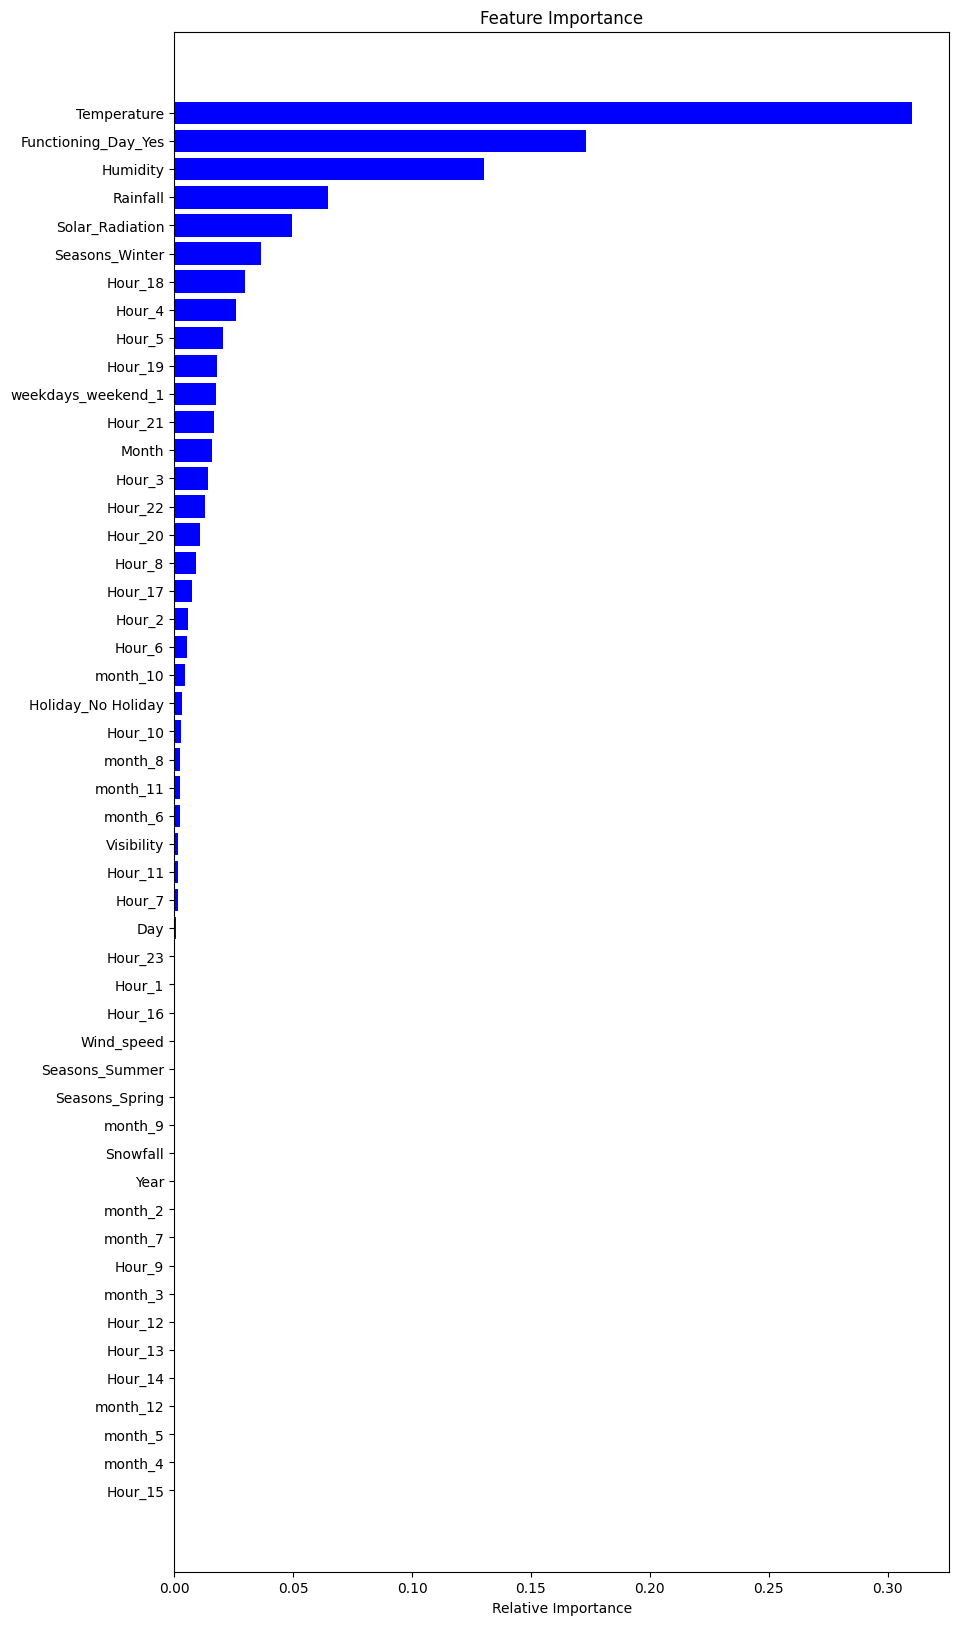

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Conclusion**

**Initial Analysis:**

**Exploratory Data Analysis (EDA):** We looked at all the features in our dataset to understand them better.

**Dependent Variable:** We analyzed the 'Rented Bike count' and applied necessary transformations to it.

**Categorical Variables:** We reviewed the categorical features and removed those where one class was dominant.

**Numerical Variables:** We studied the numerical features by checking their distributions, correlations, and how they relate to 'Rented Bike count.'

**Feature Selection:** We removed numerical features with mostly zero values.
One-Hot Encoding: We converted categorical variables into a format suitable for machine learning.

**Machine Learning Models:**

We used seven different algorithms:

Linear Regression

Lasso Regression

Ridge Regression

Elastic Net Regression

Decision Tree

Random Forest

Gradient Boosting

**Hyperparameter Tuning:** We adjusted the settings of our models to improve their performance.

Model Evaluation:

We evaluated how well each model performed and compared their results.

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  R2_score  \
Training set 0   Linear regression   4.301  32.145  5.670     0.791   
             1     Lasso regression  7.270  92.322  9.608     0.400   
             2     Ridge regression  4.301  32.145  5.670     0.791   
             3     Ridge regression  4.262  31.226  5.588     0.802   
             4     Ridge regression  4.262  31.226  5.588     0.802   
             5     Ridge regression  4.262  31.226  5.588     0.802   
             6     Ridge regression  4.262  31.226  5.588     0.802   
             7     Ridge regression  4.262  31.226  5.588     0.802   
             8     Ridge regression  4.262  31.226  5.588     0.802   
             9     Ridge regression  4.262  31.226  5.588     0.802   
             10    Ridge regression  4.262  31.226  5.588     0.802   
             11    Ridge regression  4.262  31.226  5.588     0.802   
             12    Ridge regression  4.262  31.226  5.588     0.802   
             13    Ridge regression  4.262  31.226  5.588     0.802   
Test set     0   Linear regression   4.261  31.225  5.588     0.802   
             1     Lasso regression  7.477  97.606  9.880     0.382   

                 Adjusted R2  
Training set 0          0.79  
             1          0.39  
             2          0.79  
             3          0.80  
             4          0.80  
             5          0.80  
             6          0.80  
             7          0.80  
             8          0.80  
             9          0.80  
             10         0.80  
             11         0.80  
             12         0.80  
             13         0.80  
Test set     0          0.80  
             1          0.37

# **Model Training Process:**

Exploratory Data Analysis (EDA):
Checked for null values (none found) and identified and addressed outliers.
Performed correlation analysis to find important features and conducted feature engineering.

#**Model Evaluation:**

**Gradient Boosting with GridSearchCV:**

Achieved a promising R² score of 0.91, indicating strong performance for predicting bike demand.

**Key Factors:**

Major factors influencing bike demand include Temperature, Functioning_Day_Yes, Humidity, Rainfall, and Solar Radiation.

 # **Bike Demand Insights:**

**Peak Times:** Bike demand peaks around 8-9 AM and 6-7 PM.

**Seasonal Trends:** Higher demand in summer compared to winter.

**Weather Conditions:** More demand on clear days versus snowy or rainy days.

**Temperature:** Optimal bike demand occurs when the temperature is between 22°C and 25°C.

# **Future Considerations:**

**Dataset Variability:** Since the dataset is time-dependent, factors like temperature, windspeed, and solar radiation can change, which might affect model performance.

**Adaptability:** The field of machine learning is constantly evolving. Keeping up-to-date with advancements and understanding core concepts will help in handling unexpected changes and improving model performance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***